In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Derivative

In [ ]:
def heat_dynamics(y, t, beta, psi, rho, gamma, delta):
    V, A, H = y

    flow_V_to_A = beta * V * (1 + psi * A)
    flow_A_to_V = rho * A
    flow_A_to_H = gamma * A
    flow_H_to_V = delta * H

    dVdt = -flow_V_to_A + flow_A_to_V + flow_H_to_V
    dAdt = flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = flow_A_to_H - flow_H_to_V

    return [dVdt, dAdt, dHdt]

In [ ]:
N = 100
y0 = [99, 1, 0]
t = np.linspace(0, 30, 300)


beta = 0.05
psi = 0.1
rho = 0.3
gamma = 0.1
delta = 0.1

In [ ]:
solution = odeint(heat_dynamics, y0, t, args=(beta, psi, rho, gamma, delta))
V, A, H = solution.T

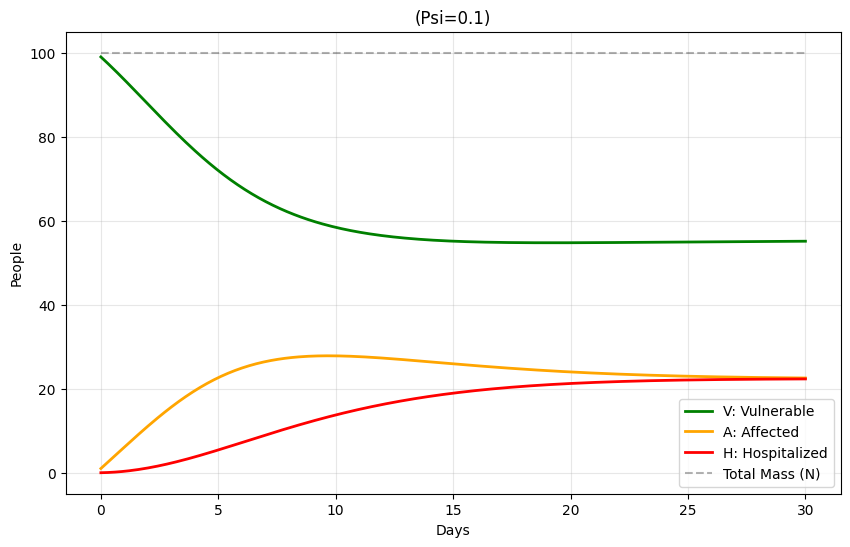

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, V, label='V: Vulnerable', color='green', linewidth=2)
plt.plot(t, A, label='A: Affected', color='orange', linewidth=2)
plt.plot(t, H, label='H: Hospitalized', color='red', linewidth=2)


plt.plot(t, V+A+H, '--', label='Total Mass (N)', color='black', alpha=0.3)

plt.title(f"(Psi={psi})")
plt.xlabel("Days")
plt.ylabel("People")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Dashboard because why not

In [ ]:
from ipywidgets import interactive, FloatSlider
import ipywidgets as widgets

def simulate_and_plot(sun_intensity, tree_cover):
    psi_val = 0.1 - (tree_cover * 0.09)

    sol = odeint(heat_dynamics, y0, t, args=(sun_intensity, psi_val, rho, gamma, delta))
    V_sim, A_sim, H_sim = sol.T

    plt.figure(figsize=(10, 6))


    plt.plot(t, A_sim, color='red', linewidth=3, label=f'Ambulance Load (Psi={psi_val:.3f})')


    plt.axhline(y=15, color='black', linestyle='--', label='Max Capacity')

    plt.fill_between(t, A_sim, 15, where=(A_sim > 15), color='red', alpha=0.3, label='Hospital Overload (Death)')

    plt.title(f"Heat Stress Simulator: Sun={sun_intensity}, Trees={tree_cover*100:.0f}%")
    plt.xlabel("Days")
    plt.ylabel("Sick People (A)")
    plt.ylim(0, 50)
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.show()

widget = interactive(simulate_and_plot,
                     sun_intensity=FloatSlider(value=0.05, min=0.01, max=0.1, step=0.01, description='Sun Heat'),
                     tree_cover=FloatSlider(value=0.0, min=0.0, max=1.0, step=0.1, description='Tree Canopy'))

display(widget)

interactive(children=(FloatSlider(value=0.05, description='Sun Heat', max=0.1, min=0.01, step=0.01), FloatSlid…

\# Situation 1: What if we break psi? (i.e. put it to 1000). Technically making crowding max. CRANK HER UP.

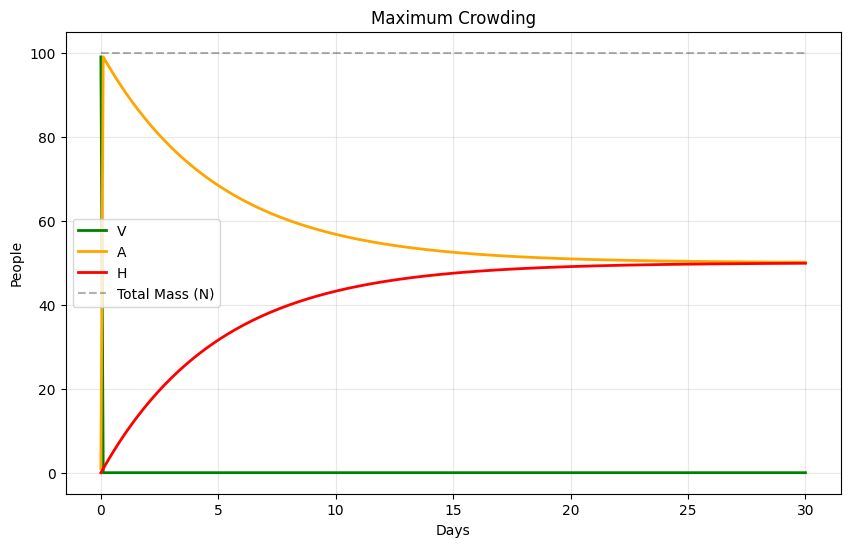

In [ ]:
N = 100               # Total people
y0 = [99, 1, 0]       # Start with 1 sick person
t = np.linspace(0, 30, 300) # 30 Days

beta = 0.05
psi = 1000
rho = 0.3
gamma = 0.1
delta = 0.1

solution = odeint(heat_dynamics, y0, t, args=(beta, psi, rho, gamma, delta))
V, A, H = solution.T

plt.figure(figsize=(10, 6))
plt.plot(t, V, label='V', color='green', linewidth=2)
plt.plot(t, A, label='A', color='orange', linewidth=2)
plt.plot(t, H, label='H', color='red', linewidth=2)

plt.plot(t, V+A+H, '--', label='Total Mass (N)', color='black', alpha=0.3)
plt.title(f"Maximum Crowding")
plt.xlabel("Days")
plt.ylabel("People")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


# Situation 2: Hospital lets you in but never out

A sick person INSTANTLY makes you sick (from fear? panic?).
Interesting question: At what value of crowding (psi) does the system become uncontrollable/trees just don't matter anymore because panic is too high?

We're also assuming people are zombies and can recover to 100% instantly.. so Rho / time? or rho times an exponential .. to simulate fatigue

An interesting direction -- prove, mechanistically, that more doctors DOES NOT fix the problem. Trees does. This is concrete, non-arguable proof that prevention is the way? you literally can't argue against it. It's math.

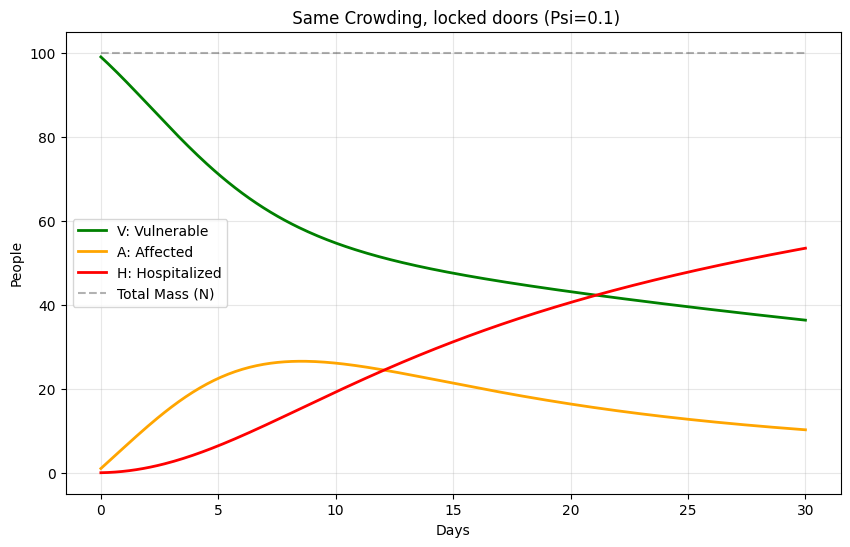

In [ ]:
N = 100
y0 = [99, 1, 0]
t = np.linspace(0, 30, 300)


beta = 0.05
psi = 0.1
rho = 0.3
gamma = 0.1
delta = 0

solution = odeint(heat_dynamics, y0, t, args=(beta, psi, rho, gamma, delta))
V, A, H = solution.T

plt.figure(figsize=(10, 6))
plt.plot(t, V, label='V: Vulnerable', color='green', linewidth=2)
plt.plot(t, A, label='A: Affected', color='orange', linewidth=2)
plt.plot(t, H, label='H: Hospitalized', color='red', linewidth=2)


plt.plot(t, V+A+H, '--', label='Total Mass (N)', color='black', alpha=0.3)

plt.title(f" Same Crowding, locked doors (Psi={psi})")
plt.xlabel("Days")
plt.ylabel("People")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Situation 3: BREAK THE SUN!


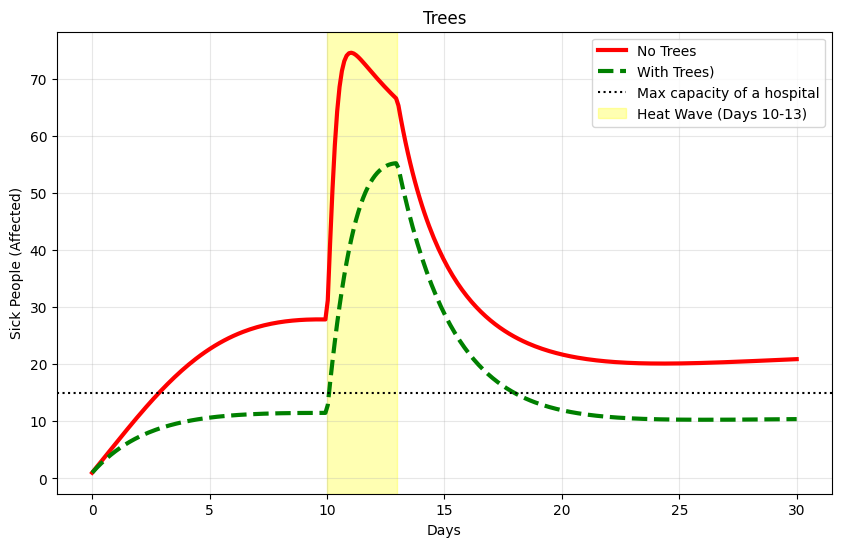

In [ ]:
def break_sun(y, t, psi, rho, gamma, delta):
    V, A, H = y


    if 10 <= t <= 13:
        beta = 0.5
    else:
        beta = 0.05

    flow_V_to_A = beta * V * (1 + psi * A)
    flow_A_to_V = rho * A
    flow_A_to_H = gamma * A
    flow_H_to_V = delta * H

    dVdt = -flow_V_to_A + flow_A_to_V + flow_H_to_V
    dAdt = flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = flow_A_to_H - flow_H_to_V

    return [dVdt, dAdt, dHdt]
t = np.linspace(0, 30, 300)
y0 = [99, 1, 0]

rho = 0.3
gamma = 0.1
delta = 0.1

sol_trees = odeint(break_sun, y0, t, args=(0.01, rho, gamma, delta))

sol_city = odeint(break_sun, y0, t, args=(0.1, rho, gamma, delta))

A_trees = sol_trees[:, 1]
A_city = sol_city[:, 1]

plt.figure(figsize=(10, 6))

plt.plot(t, A_city, 'r-', linewidth=3, label='No Trees')

plt.plot(t, A_trees, 'g--', linewidth=3, label='With Trees)')

plt.axhline(y=15, color='black', linestyle=':', label='Max capacity of a hospital')

plt.axvspan(10, 13, color='yellow', alpha=0.3, label='Heat Wave (Days 10-13)')

plt.title("Trees")
plt.xlabel("Days")
plt.ylabel("Sick People (Affected)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Notes on graph
- Distance between red peak and green peak = saved lives, so about ~20 people (75 in red - 55 in green = 20). Trees = 25% reduction in panic (psi).
- Notice the Red line in the heat wave - it is vertical! Green is a curve..
- Interesting! In a city, the system is ALREADY over capacity BEFORE the heat event!
- At day 20 and beyond, the red line is still WAY above the limit.
  - Heat wave effect "lingers" for weeks after the sun goes down. The trees also make us recover faster (below hospital faster).
- If we plot the area under the curve for the red line (above the capacity line) that represents total days suffering from heat.

# Conclusion: Planting a tree is mathematically more powerful than hiring doctors. Okay... we already know that. What can we do about it? (Policy/Tool time). The core of the thesis is validated.

## We can consider this as the first phase of the thesis done. Now we can move to what we can do about it?

## We have to address that heat is cumulative (rho times an exponential)

# Concrete Case Study - 2021 BC Heat dome (to be simulated)

https://climateinstitute.ca/wp-content/uploads/2023/06/The-case-for-adapting-to-extreme-heat-costs-of-the-BC-heat-wave.pdf


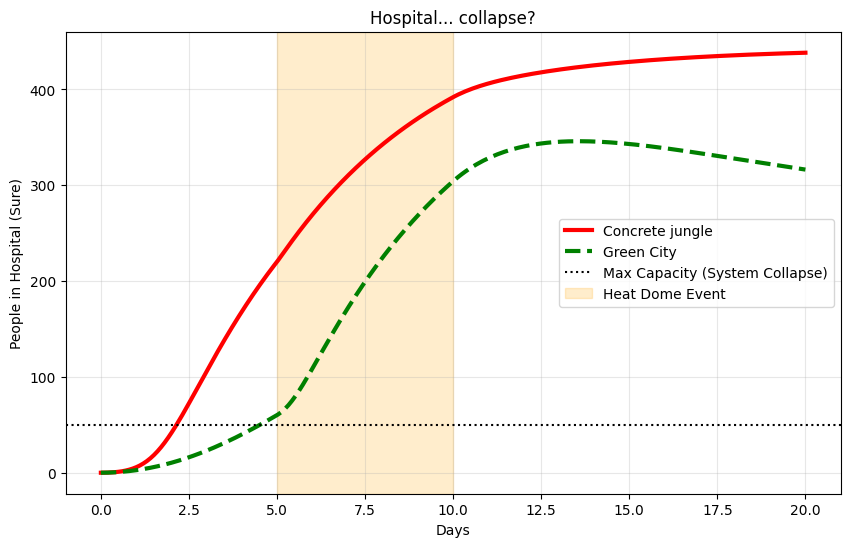

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def heat_dome_beta(t):
    if 5 <= t <= 10:
        return 0.3  # BC Heat Dome (Days 5-10)
    else:
        return 0.05 # Normal Summer

def system(y, t, psi, rho, gamma, delta):
    V, A, H = y

    current_sun = heat_dome_beta(t)

    flow_V_to_A = current_sun * V * (1 + psi * A)
    flow_A_to_H = gamma * A
    flow_A_to_V = rho * A
    flow_H_to_V = delta * H

    # The Changes
    dVdt = -flow_V_to_A + flow_A_to_V + flow_H_to_V
    dAdt = flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = flow_A_to_H - flow_H_to_V

    return [dVdt, dAdt, dHdt]

t = np.linspace(0, 20, 200)
y0 = [1000, 1, 0] # 1000 people

# Concrete City (Trap heat)
sol_city = odeint(system, y0, t, args=(0.05, 0.2, 0.1, 0.1))

# Green City (Heat dissipates)
sol_green = odeint(system, y0, t, args=(0.01, 0.2, 0.1, 0.1))

plt.figure(figsize=(10, 6))
plt.plot(t, sol_city[:, 2], 'r-', linewidth=3, label='Concrete jungle')
plt.plot(t, sol_green[:, 2], 'g--', linewidth=3, label='Green City')

plt.axhline(y=50, color='black', linestyle=':', label='Max Capacity (System Collapse)')
plt.axvspan(5, 10, color='orange', alpha=0.2, label='Heat Dome Event')

plt.title("Hospital... collapse?")
plt.ylabel("People in Hospital (Sure)")
plt.xlabel("Days")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

peak_city = np.max(sol_city[:, 2])
peak_green = np.max(sol_green[:, 2])

# Next Steps:

- Add a death bucket? No, complex. Keep it elegant (3)
- Lean on the mechanism and the confidence to be like "It CAUSES!". But with confidence. "What if heat is a virus?"
- Keep it just Heat versus Trees. That's it. Mo AC coverage, etc. Elegance (not simplicity, but elegance).
- We can also talk about the 2021 heat dome.

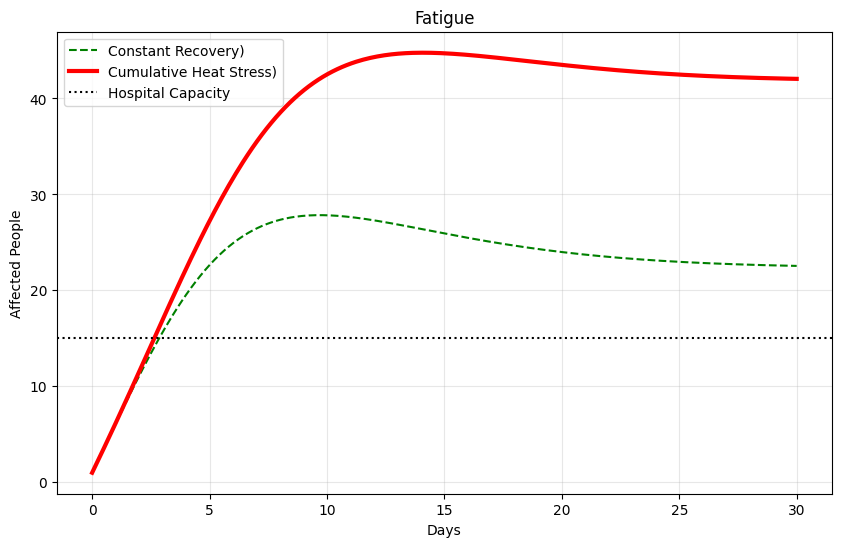

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def heat_dynamics_tired(y, t, beta, psi, rho_base, gamma, delta, fatigue_rate):
    V, A, H = y

    # Recovery shrinks as time goes on.
    current_rho = rho_base * np.exp(-fatigue_rate * t)

    flow_V_to_A = beta * V * (1 + psi * A)
    flow_A_to_V = current_rho * A
    flow_A_to_H = gamma * A
    flow_H_to_V = delta * H

    dVdt = -flow_V_to_A + flow_A_to_V + flow_H_to_V
    dAdt = flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = flow_A_to_H - flow_H_to_V

    return [dVdt, dAdt, dHdt]

t = np.linspace(0, 30, 300)
y0 = [99, 1, 0]
beta, psi, gamma, delta = 0.05, 0.1, 0.1, 0.1
rho_base = 0.3

# Scenario A (fatigue is 0)
sol_robot = odeint(heat_dynamics_tired, y0, t, args=(beta, psi, rho_base, gamma, delta, 0.0))
# Scenario B:(fatigue = 0.1)
sol_human = odeint(heat_dynamics_tired, y0, t, args=(beta, psi, rho_base, gamma, delta, 0.1))

plt.figure(figsize=(10, 6))
plt.plot(t, sol_robot[:, 1], 'g--', label='Constant Recovery)')
plt.plot(t, sol_human[:, 1], 'r-', linewidth=3, label='Cumulative Heat Stress)')
plt.axhline(y=15, color='black', linestyle=':', label='Hospital Capacity')
plt.title("Fatigue")
plt.xlabel("Days")
plt.ylabel("Affected People")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Add a delay for before when people get affected

Add a lot of background (diff equations, SIR, biology, historically heat is regression, dyanmic modelling of heat, multi-linear regression, rationale is that it is dynamic modelling). How do differential ewuations help us? (why math and not regression). Rationale is to show the pwoer of differential equations in that they can also be applied to heat, but more broadly to other phenomena. Climate change !! biggest context as to why we are choosing dynamics. for why not regression.

Lean on the psi and rho (add-ons) --> originality, after I show the core stuff, then show the add ons to show flexibility of diff equations

From theory to generalization. Derivative of psi. Find stability/equilibria, long-term outcomes. Use 2021 BC heat dome as example to model it. how can we use this? Can we also take it to other things, provide a launch pad for other epi researchers.

Add special cases (a couple important "what if's", or edge cases, 3 most important ones).

Address limitations/assumptions, look for extreme values/equilibria. Stability analysis, what's the direction.

Most important: implications of this beyond the work/lay for future work.

Not directly causal language, just blame it on the equations. Let causality be inferred. Declare declare declare, just don't impose.

Powerpoint, where I am, overview, future directions.


### Eric's insights:
China study, yui goo, green space measures, which green space is most important for temp extremes, tree canopy, scenarios of increasing tree canopy, exposure-response curve. Use BC example, or case-study (nation wide data on emergency department visits), neighbourhood level data. Fine spatial scale. Compare current green space exposure. Tree canopy investigations.
Yui guouo. Case-time series approach. Have some small spatial scale data, for assessing neighbourhoods. Public health importance → neighbourhood level. Use data to look at neighbourhood level impacts how likely extreme temperatures have impacts on ED visits. How likely this attentuates the exposure-response curve. Apply the math to public health.
How likely this would have a reduction in ED visits if we increase tree canopy by different percentages. Dispprtpotionatey impacted populations → equity. DA’s (dissemination areas), we have SES data on them, if we increase green space exposure, are the lower SES gonna benefit more from increasing tree canopy coverage. People of higher SES might have better access to AC, etc, swimming pool, etc, those of lower SES have less access. Could these benefit the most from tree canopy increasing tree canopy.,.

---
- identify the paper he was talking about
- Really lean on the "how can we use this".

### I had questions on overfitting, test vs train set --> I am a PHYSICIST not a DATA SCIENTIST!!

### Calibration against the 2021 BC heat dome

this is figure 1 page 13
https://www2.gov.bc.ca/assets/gov/birth-adoption-death-marriage-and-divorce/deaths/coroners-service/death-review-panel/extreme_heat_death_review_panel_report.pdf

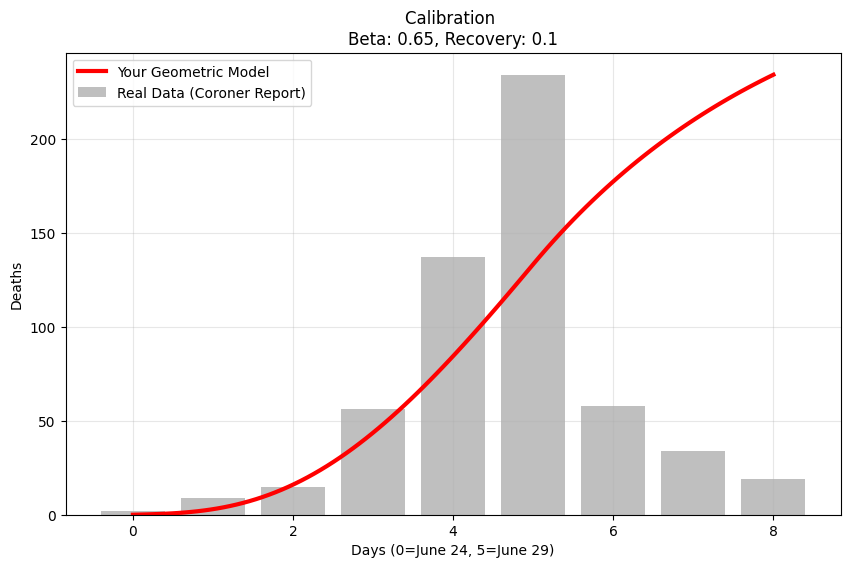

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Figure 1 from BC heat dome
real_days = [0, 1, 2, 3, 4, 5, 6, 7, 8] # 0 = <25 June, 8 = 02 July
real_deaths = [2, 9, 15, 56, 137, 234, 58, 34, 19]

def heat_wave_dynamics(y, t, beta_max, recovery_rate):
    V, A, H = y

    if 0 <= t <= 5:
        current_beta = beta_max * (t / 5)
    else:
        current_beta = 0.0 # Heatwave breaks slightly

    # Trapping heat, so recovery must be lower

    flow_V_to_A = current_beta * V
    flow_A_to_V = recovery_rate * A
    flow_A_to_H = 0.2 * A

    dVdt = -flow_V_to_A + flow_A_to_V
    dAdt = flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = flow_A_to_H

    return [dVdt, dAdt, dHdt]

# Tweak these to match figure 1
beta_input = 0.65   # How aggressive is the sun?
recovery_input = 0.1 # How fast do houses cool down? (Low = Figure 6)

N = 100
y0 = [99, 1, 0]
t_sim = np.linspace(0, 8, 100)

sol = odeint(heat_wave_dynamics, y0, t_sim, args=(beta_input, recovery_input))
H_sim = sol[:, 2]

scale_factor = max(real_deaths) / max(H_sim)
H_scaled = H_sim * scale_factor

plt.figure(figsize=(10, 6))

plt.bar(real_days, real_deaths, color='gray', alpha=0.5, label='Real Data (Coroner Report)')

plt.plot(t_sim, H_scaled, color='red', linewidth=3, label='Your Geometric Model')

plt.title(f"Calibration \nBeta: {beta_input}, Recovery: {recovery_input}")
plt.xlabel("Days (0=June 24, 5=June 29)")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

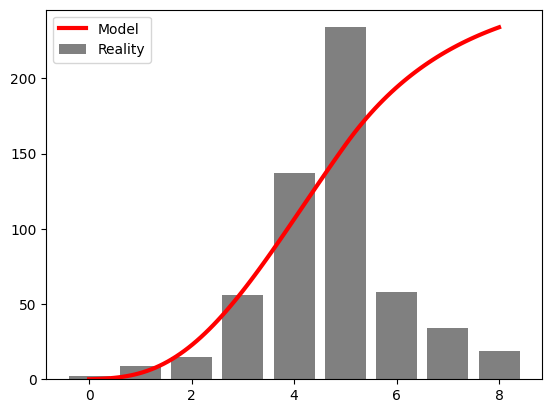

In [ ]:

real_deaths = [2, 9, 15, 56, 137, 234, 58, 34, 19]

def heat_dynamics(y, t, beta_max, rho, gamma):
    V, A, H = y

    if t < 5:
        current_beta = beta_max * (t / 5)
    else:
        current_beta = 0 # Sun sets after the heatwave

    flow_V_to_A = current_beta * V
    flow_A_to_V = rho * A
    flow_A_to_H = gamma * A

    dVdt = -flow_V_to_A + flow_A_to_V
    dAdt = flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = flow_A_to_H

    return [dVdt, dAdt, dHdt]

# We guess these numbers first, then change themm to fit the graph.
beta_guess = 0.85   # Strong sun
rho_guess = 0.05    # Trap heat aka low recovery
gamma_guess = 0.4  # 20% will die

t = np.linspace(0, 8, 100)
y0 = [99, 1, 0] # Start with 100 people
solution = odeint(heat_dynamics, y0, t, args=(beta_guess, rho_guess, gamma_guess))
H_simulated = solution[:, 2]

scale = max(real_deaths) / max(H_simulated)

plt.bar(range(9), real_deaths, color='gray', label='Reality')
plt.plot(t, H_simulated * scale, color='red', linewidth=3, label='Model')
plt.legend()
plt.show()

Next steps: Match the knobs with the curve, get the red line to shoot up, hit the top of the gray bar on day 5, then bend over/come down.

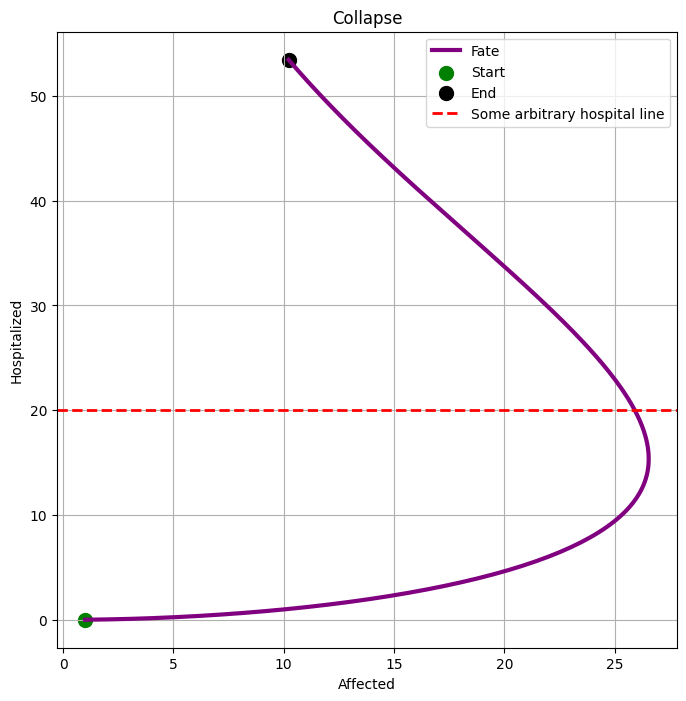

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(A, H, color='purple', linewidth=3, label='Fate')

plt.scatter(A[0], H[0], color='green', s=100, label='Start')
plt.scatter(A[-1], H[-1], color='black', s=100, label='End')

# Say the hospital collapses if H > 20.
plt.axhline(y=20, color='red', linestyle='--', linewidth=2, label='Some arbitrary hospital line')

plt.title("Collapse")
plt.xlabel("Affected")
plt.ylabel("Hospitalized")
plt.grid(True)
plt.legend()
plt.show()

### 1. Conservation analysis

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

def system_flow(y, t, beta, psi, rho, gamma, delta):
    V, A, H = y


    flow_V_to_A = beta * V * (1 + psi * A)
    flow_A_to_V = rho * A
    flow_A_to_H = gamma * A
    flow_H_to_V = delta * H


    dVdt = -flow_V_to_A + flow_A_to_V + flow_H_to_V
    dAdt = +flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = +flow_A_to_H - flow_H_to_V

    return [dVdt, dAdt, dHdt]

def run_simulation(beta=0.05, psi=0.1, rho=0.1, gamma=0.05, delta=0.1):
    N = 100
    y0 = [99, 1, 0] # Start with 99 Vulnerable, 1 Affected
    t = np.linspace(0, 50, 500)

    # Solve
    solution = odeint(system_flow, y0, t, args=(beta, psi, rho, gamma, delta))
    V, A, H = solution.T


    total_mass = V + A + H
    mass_deviation = total_mass - N
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})


    ax1.plot(t, V, label='Vulnerable', color='#2ecc71', linewidth=2)
    ax1.plot(t, A, label='Affected (Sick)', color='#e67e22', linewidth=2)
    ax1.plot(t, H, label='Hospitalized', color='#e74c3c', linewidth=2)
    ax1.set_title("Flow test", fontsize=14)
    ax1.set_ylabel("Population")
    ax1.legend()
    ax1.grid(True, alpha=0.3)


    ax2.plot(t, mass_deviation, color='black', linestyle='--', linewidth=1)
    ax2.set_title("Conservation", fontsize=12)
    ax2.set_xlabel("Time (Days)")
    ax2.set_ylabel("Error (Lost People)")
    ax2.set_ylim(-1, 1)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Parameters: Beta={beta}, Psi={psi}, Rho={rho}, Gamma={gamma}")
    print(f"Final State -> V: {V[-1]:.4f}, A: {A[-1]:.4f}, H: {H[-1]:.4f}")
    print(f"Total Mass Start: {total_mass[0]:.4f}")
    print(f"Total Mass End:   {total_mass[-1]:.4f}")
    print(f"Max Absolute Error: {np.max(np.abs(mass_deviation)):.8f}")
    print("-------------------------")

# Create the Dashboard
interact(run_simulation,
         beta=FloatSlider(min=0.01, max=1.0, step=0.01, value=0.05, description='Sun (Beta)'),
         psi=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.1, description='Crowd (Psi)'),
         rho=FloatSlider(min=0.0, max=0.5, step=0.01, value=0.1, description='Recover (Rho)'),
         gamma=FloatSlider(min=0.0, max=0.5, step=0.01, value=0.05, description='Sickness (Gam)'),
         delta=FloatSlider(min=0.0, max=0.5, step=0.01, value=0.1, description='Discharge (Del)'));

interactive(children=(FloatSlider(value=0.05, description='Sun (Beta)', max=1.0, min=0.01, step=0.01), FloatSl…

In [ ]:
import numpy as np


class Unit:
    def __init__(self, value, units):
        self.value = value
        self.units = units

    def __add__(self, other):
        if self.units != other.units:
            raise ValueError(f"DIMENSIONAL ERROR: Cannot add {self.units} to {other.units}")
        return Unit(self.value + other.value, self.units)

    def __mul__(self, other):
        new_units = self.units.copy()
        for u, p in other.units.items():
            new_units[u] = new_units.get(u, 0) + p
        # Clean up zero powers
        new_units = {k: v for k, v in new_units.items() if v != 0}
        return Unit(self.value * other.value, new_units)

    def __repr__(self):
        return f"{self.value} [{self.units}]"

V = Unit(99, {'P': 1})
A = Unit(1, {'P': 1})
H = Unit(0, {'P': 1})

Beta = Unit(0.05, {'T': -1})        # 1/Day
Rho = Unit(0.1, {'T': -1})          # 1/Day
Gamma = Unit(0.05, {'T': -1})       # 1/Day
Delta = Unit(0.1, {'T': -1})        # 1/Day
Psi = Unit(0.1, {'P': -1})          # 1/People
One = Unit(1, {})                   # Constant

try:
    # Reconstruct the Infection Term: Beta * V * (1 + Psi * A)
    # Step A: Psi * A
    congestion_term = Psi * A
    print(f"Psi * A unit: {congestion_term.units} (Should be empty/unitless)")

    # Step B: (1 + Psi * A)
    interaction_factor = One + congestion_term

    # Step C: Beta * V
    base_infection = Beta * V

    # Step D: Full Flow
    flow_V_to_A = base_infection * interaction_factor
    print(f"Flow V->A unit: {flow_V_to_A.units} (Should be {{'P': 1, 'T': -1}})")

    # Reconstruct Recovery Term: Rho * A
    flow_A_to_V = Rho * A
    print(f"Flow A->V unit: {flow_A_to_V.units} (Should be {{'P': 1, 'T': -1}})")

    dVdt = Unit(0, {'P': 1, 'T': -1}) + (flow_A_to_V * Unit(-1, {})) # Adding negative flow
    print("Pass.")

except ValueError as e:
    print(f"Bad: {e}")

print("\n--- 2. RUNNING LIMITS STRESS TEST ---")

def get_derivatives(y, beta, psi, rho, gamma, delta):
    V, A, H = y
    flow_V_to_A = beta * V * (1 + psi * A)
    flow_A_to_V = rho * A
    flow_A_to_H = gamma * A
    flow_H_to_V = delta * H
    return [-flow_V_to_A + flow_A_to_V + flow_H_to_V,
            flow_V_to_A - flow_A_to_V - flow_A_to_H,
            flow_A_to_H - flow_H_to_V]

# Limit 1: No People
dy = get_derivatives([0, 0, 0], 0.05, 0.1, 0.1, 0.05, 0.1)
print(f"Empty World Change: {dy} (Should be [0, 0, 0])")

# Limit 2: Sun boom
# If Beta is huge, people should leave V instantly, but NOT go negative math-wise in one step
dy_huge = get_derivatives([100, 0, 0], 1000000, 0.1, 0.1, 0.05, 0.1)
print(f"Infinite Sun dV/dt: {dy_huge[0]}")


dy_neg = get_derivatives([-10, 0, 0], 0.05, 0.1, 0.1, 0.05, 0.1)
print(f"Negative People dV/dt: {dy_neg[0]}")

Psi * A unit: {} (Should be empty/unitless)
Flow V->A unit: {'T': -1, 'P': 1} (Should be {'P': 1, 'T': -1})
Flow A->V unit: {'T': -1, 'P': 1} (Should be {'P': 1, 'T': -1})
Pass.

--- 2. RUNNING LIMITS STRESS TEST ---
Empty World Change: [0.0, 0.0, 0.0] (Should be [0, 0, 0])
Infinite Sun dV/dt: -100000000.0
Negative People dV/dt: 0.5


### Dimensional Analysis is confirmed for the three equations.
- Rates (Beta, rho, gamma, delta) all are 1/day
- Crowding (psi) is 1/people
- Time is in days
- V, A, H are people

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def phase_portrait(beta=0.1, psi=0.1, rho=0.1, gamma=0.05, delta=0.1):

    N = 100
    grid_points = 20
    v_vals = np.linspace(0, N, grid_points)
    a_vals = np.linspace(0, N, grid_points)
    V, A = np.meshgrid(v_vals, a_vals)

    H = N - V - A

    mask = H >= 0

    flow_V_to_A = beta * V * (1 + psi * A)
    flow_A_to_V = rho * A
    flow_A_to_H = gamma * A
    flow_H_to_V = delta * H

    dVdt = -flow_V_to_A + flow_A_to_V + flow_H_to_V
    dAdt = +flow_V_to_A - flow_A_to_V - flow_A_to_H


    dVdt = np.ma.masked_where(~mask, dVdt)
    dAdt = np.ma.masked_where(~mask, dAdt)
    fig, ax = plt.subplots(figsize=(8, 8))

    strm = ax.streamplot(V, A, dVdt, dAdt, color=dAdt, cmap='coolwarm', density=1.5, linewidth=1.5, arrowsize=1.5)

    ax.set_title(f"Phase Portrait\n(Beta={beta}, Psi={psi})", fontsize=14)
    ax.set_xlabel("V")
    ax.set_ylabel("A")
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    ax.plot([0, 100], [100, 0], 'k--', alpha=0.5, label='Conservation (N=100)')
    ax.text(60, 60, "No-No Zone\n(V+A > 100)", fontsize=10, color='gray')

    plt.grid(True, alpha=0.3)
    plt.show()


    test_V, test_A, test_H = 50.0, 50.0, 0.0

    probe_flow_V2A = beta * test_V * (1 + psi * test_A)
    probe_flow_A2V = rho * test_A
    probe_flow_A2H = gamma * test_A
    probe_flow_H2V = delta * test_H

    probe_dV = -probe_flow_V2A + probe_flow_A2V + probe_flow_H2V
    probe_dA = +probe_flow_V2A - probe_flow_A2V - probe_flow_A2H

    print(f"Parameters: Beta={beta}, Psi={psi}, Rho={rho}")
    print(f"Vector dV/dt (Change in Healthy): {probe_dV:.4f}")
    print(f"Vector dA/dt (Change in Sick):    {probe_dA:.4f}")

interact(phase_portrait,
         beta=FloatSlider(min=0.00, max=0.2, step=0.005, value=0.05, description='Beta (Sun)'),
         psi=FloatSlider(min=0.0, max=0.2, step=0.01, value=0.05, description='Psi (Panic)'),
         rho=FloatSlider(min=0.0, max=0.5, step=0.05, value=0.1, description='Rho (recovery)'),
         gamma=FloatSlider(min=0.0, max=0.2, step=0.01, value=0.05, description='Gamma (Hospital)'),
         delta=FloatSlider(min=0.0, max=0.2, step=0.01, value=0.1, description='Delta (Discharge)'));

interactive(children=(FloatSlider(value=0.05, description='Beta (Sun)', max=0.2, step=0.005), FloatSlider(valu…

- Red zone = High vulnerable (~80), low sick (~10 Affected), city is full of health people, sun hits. Arrows point up and left, meaning people are leaving V and flooding into A

- Blue zone = low vulnerable, high sick. HEAT has burned through everyone, no one left to infect. THEY POINT down. The sick population drops. Receding crisis.

- The swirl is around 40 vulnerable, 40 Affected. With these settings (beta = 0.05, constant sun, rho = 0.1, the city never heals, stuck permanently with 40% of people permanently sick/stressed. This is called endemic equilibrium.

SUPER COOL

Interesting... beta (sun) is a constant. We turn it on day 0, we go. BUILDINGS ARE BATTERIES YOU DUMMY! they hold heat. Humans have thermal mass.. WE were too fast.

--- INITIALIZING SOLVER ---
Trying combinations of Beta, Psi, rho...

*** SOLVER FINISHED ***
Lowest Error Found: 26.79
Best Parameters: {'Beta': np.float64(0.6333333333333333), 'Psi': np.float64(0.0), 'Rho': np.float64(0.6), 'PeakDay': 4}


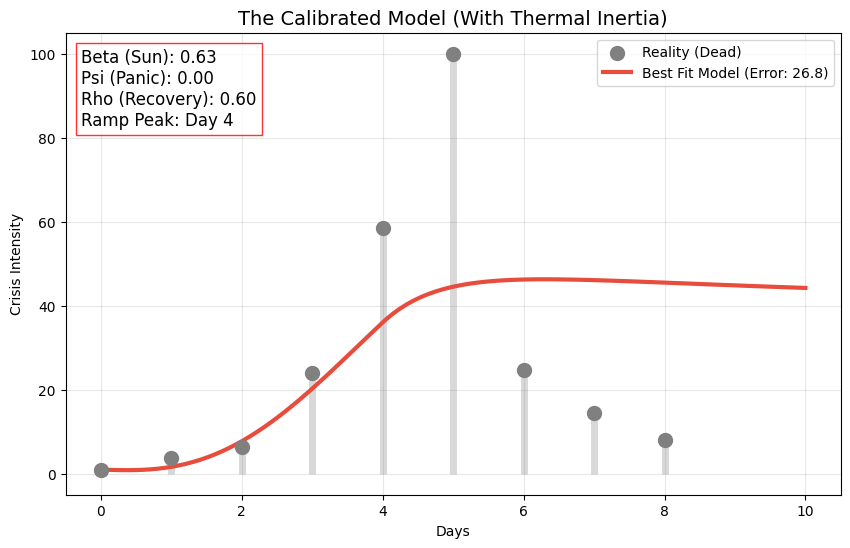

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from itertools import product

real_days = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
real_deaths = np.array([2, 9, 15, 56, 137, 234, 58, 34, 19])

scale_factor = 100 / np.max(real_deaths)
normalized_data = real_deaths * scale_factor

def heat_dynamics_ramp(y, t, beta_max, psi, rho, gamma, peak_day):
    V, A, H = y


    if t < peak_day:
        current_beta = beta_max * (t / peak_day)**2
    else:
        current_beta = beta_max

    flow_V_to_A = current_beta * V * (1 + psi * A)
    flow_A_to_V = rho * A
    flow_A_to_H = gamma * A
    flow_H_to_V = 0.1 * H

    dVdt = -flow_V_to_A + flow_A_to_V + flow_H_to_V
    dAdt = flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = flow_A_to_H - flow_H_to_V
    return [dVdt, dAdt, dHdt]


print("--- INITIALIZING SOLVER ---")
print("Trying combinations of Beta, Psi, rho...")

best_error = float('inf')
best_params = {}
best_curve = []


betas = np.linspace(0.3, 0.8, 10)
psis = np.linspace(0.0, 0.1, 5)
rhos = np.linspace(0.1, 0.6, 10)
peak_days = [4, 5, 6]


t_model = np.linspace(0, 10, 100)
y0 = [99, 1, 0]

iterations = 0
for b, p, r, day in product(betas, psis, rhos, peak_days):
    sol = odeint(heat_dynamics_ramp, y0, t_model, args=(b, p, r, 0.05, day))
    A_curve = sol[:, 1]

    model_at_days = np.interp(real_days, t_model, A_curve)
    error = np.sqrt(np.mean((model_at_days - normalized_data)**2))

    if error < best_error:
        best_error = error
        best_params = {'Beta': b, 'Psi': p, 'Rho': r, 'PeakDay': day}
        best_curve = A_curve


print(f"\n*** SOLVER FINISHED ***")
print(f"Lowest Error Found: {best_error:.2f}")
print(f"Best Parameters: {best_params}")

fig, ax = plt.subplots(figsize=(10, 6))


ax.scatter(real_days, normalized_data, color='gray', s=100, label='Reality (Dead)', zorder=10)
ax.vlines(real_days, 0, normalized_data, color='gray', alpha=0.3, linewidth=5)


ax.plot(t_model, best_curve, color='#e74c3c', linewidth=3, label=f"Best Fit Model (Error: {best_error:.1f})")

param_text = f"Beta (Sun): {best_params['Beta']:.2f}\nPsi (Panic): {best_params['Psi']:.2f}\nRho (Recovery): {best_params['Rho']:.2f}\nRamp Peak: Day {best_params['PeakDay']}"
ax.text(0.02, 0.8, param_text, transform=ax.transAxes, fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

ax.set_title("The Calibrated Model (With Thermal Inertia)", fontsize=14)
ax.set_ylabel("Crisis Intensity")
ax.set_xlabel("Days")
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

- PSI IS USELESS!!!??

Trail: gauss curve

Belly curvy ---
Constants hunting...
Lowest Error Found: 19.94
Best Parameters: {'Beta': np.float64(1.1428571428571428), 'Psi': np.float64(0.0), 'Rho': np.float64(0.8), 'Width': 1.5}


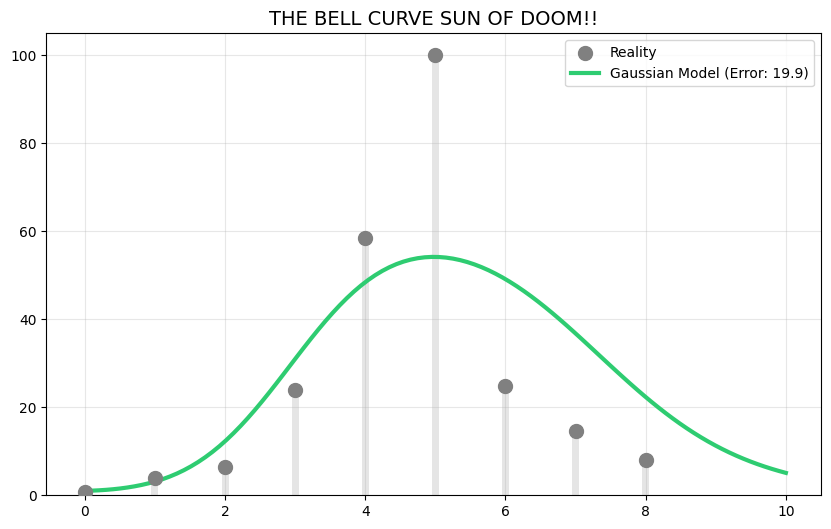

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from itertools import product


real_days = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
real_deaths = np.array([2, 9, 15, 56, 137, 234, 58, 34, 19])
scale_factor = 100 / np.max(real_deaths)
normalized_data = real_deaths * scale_factor

def heat_dynamics_gaussian(y, t, beta_max, psi, rho, gamma, peak_day, width):
    V, A, H = y

    current_beta = beta_max * np.exp(-0.5 * ((t - peak_day) / width)**2)

    flow_V_to_A = current_beta * V * (1 + psi * A)
    flow_A_to_V = rho * A
    flow_A_to_H = gamma * A
    flow_H_to_V = 0.5 * H

    dVdt = -flow_V_to_A + flow_A_to_V + flow_H_to_V
    dAdt = flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = flow_A_to_H - flow_H_to_V
    return [dVdt, dAdt, dHdt]

print("Belly curvy ---")
print("Constants hunting...")

best_error = float('inf')
best_params = {}
best_curve = []

# Ranges (We cast a wider net)
betas = np.linspace(0.8, 2.0, 8)
psis = np.linspace(0.0, 0.2, 5)
rhos = np.linspace(0.1, 0.8, 5)
widths = [1.5, 2.0]

t_model = np.linspace(0, 10, 100)
y0 = [99, 1, 0]

for b, p, r, w in product(betas, psis, rhos, widths):
    sol = odeint(heat_dynamics_gaussian, y0, t_model, args=(b, p, r, 0.05, 4.5, w))
    A_curve = sol[:, 1]

    model_at_days = np.interp(real_days, t_model, A_curve)
    error = np.sqrt(np.mean((model_at_days - normalized_data)**2))

    if error < best_error:
        best_error = error
        best_params = {'Beta': b, 'Psi': p, 'Rho': r, 'Width': w}
        best_curve = A_curve

print(f"Lowest Error Found: {best_error:.2f}")
print(f"Best Parameters: {best_params}")

fig, ax = plt.subplots(figsize=(10, 6))

# Reality
ax.scatter(real_days, normalized_data, color='gray', s=100, label='Reality', zorder=10)
ax.bar(real_days, normalized_data, color='gray', alpha=0.2, width=0.1)

ax.plot(t_model, best_curve, color='#2ecc71', linewidth=3, label=f"Gaussian Model (Error: {best_error:.1f})")


ax.set_title("THE BELL CURVE SUN OF DOOM!!", fontsize=14)
ax.set_ylim(0, 105)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

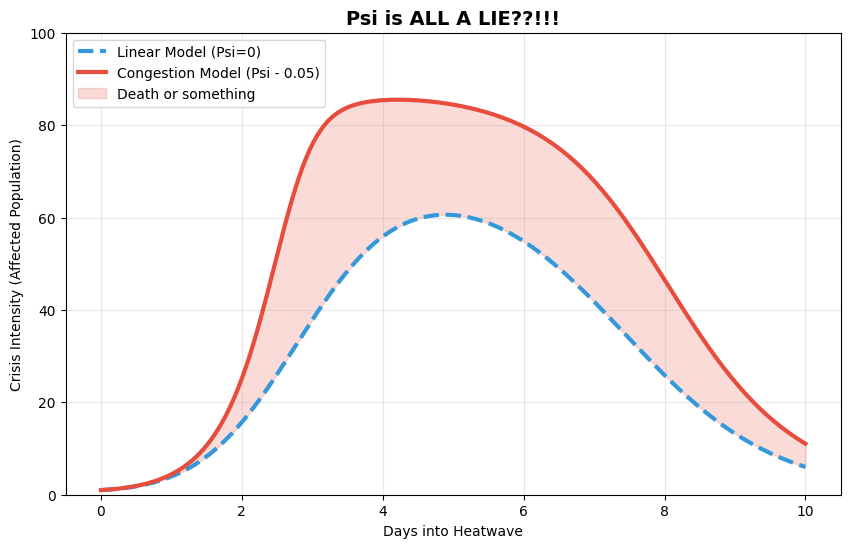

Peak Crisis (Linear):   60.60
Peak Crisis (Complex):  85.50


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def heat_dynamics_gaussian(y, t, beta_max, psi, rho, gamma, peak_day, width):
    V, A, H = y
    current_beta = beta_max * np.exp(-0.5 * ((t - peak_day) / width)**2)
    flow_V_to_A = current_beta * V * (1 + psi * A)
    flow_A_to_V = rho * A
    flow_A_to_H = gamma * A
    flow_H_to_V = 0.5 * H

    dVdt = -flow_V_to_A + flow_A_to_V + flow_H_to_V
    dAdt = flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = flow_A_to_H - flow_H_to_V
    return [dVdt, dAdt, dHdt]

t_future = np.linspace(0, 10, 200)
y0 = [99, 1, 0]

RHO_CALIBRATED = 0.8
WIDTH_CALIBRATED = 1.5
GAMMA_CALIBRATED = 0.05
BETA_FUTURE = 1.5

sol_A = odeint(heat_dynamics_gaussian, y0, t_future,
               args=(BETA_FUTURE, 0.0, RHO_CALIBRATED, GAMMA_CALIBRATED, 4.5, WIDTH_CALIBRATED))
A_city_linear = sol_A[:, 1]

sol_B = odeint(heat_dynamics_gaussian, y0, t_future,
               args=(BETA_FUTURE, 0.05, RHO_CALIBRATED, GAMMA_CALIBRATED, 4.5, WIDTH_CALIBRATED))
A_city_complex = sol_B[:, 1]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(t_future, A_city_linear, color='#3498db', linewidth=3, linestyle='--',
        label=f'Linear Model (Psi=0)')

ax.plot(t_future, A_city_complex, color='#e74c3c', linewidth=3,
        label=f'Congestion Model (Psi - 0.05)')

ax.fill_between(t_future, A_city_linear, A_city_complex, color='#e74c3c', alpha=0.2, label='Death or something')

ax.set_title("Psi is ALL A LIE??!!!", fontsize=14, fontweight='bold')
ax.set_ylabel("Crisis Intensity (Affected Population)")
ax.set_xlabel("Days into Heatwave")
ax.set_ylim(0, 100)

ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.show()

print(f"Peak Crisis (Linear):   {np.max(A_city_linear):.2f}")
print(f"Peak Crisis (Complex):  {np.max(A_city_complex):.2f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, FloatSlider

def heat_dynamics(y, t, beta_max, psi, rho, gamma, peak_day, width):
    V, A, H = y

    current_beta = beta_max * np.exp(-0.5 * ((t - peak_day) / width)**2)

    flow_V_to_A = current_beta * V * (1 + psi * A)

    flow_A_to_V = rho * A
    flow_A_to_H = gamma * A
    flow_H_to_V = 0.5 * H

    dVdt = -flow_V_to_A + flow_A_to_V + flow_H_to_V
    dAdt = flow_V_to_A - flow_A_to_V - flow_A_to_H
    dHdt = flow_A_to_H - flow_H_to_V
    return [dVdt, dAdt, dHdt]

#
def flight_simulator(beta=1.5, psi=0.05, rho=0.8):
    t = np.linspace(0, 10, 200)
    y0 = [99, 1, 0] # Start with 1 sick person

    # (Calibrated from 2021)
    PEAK_DAY = 4.5
    WIDTH = 1.5
    GAMMA = 0.05

    sol_linear = odeint(heat_dynamics, y0, t, args=(beta, 0.0, rho, GAMMA, PEAK_DAY, WIDTH))
    A_linear = sol_linear[:, 1]

    sol_complex = odeint(heat_dynamics, y0, t, args=(beta, psi, rho, GAMMA, PEAK_DAY, WIDTH))
    A_complex = sol_complex[:, 1]

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(t, A_linear, color='#3498db', linewidth=2, linestyle='--', label='Linear Assumption')

    ax.plot(t, A_complex, color='#e74c3c', linewidth=4, label=f'Model (Panic Factor = {psi})')

    ax.fill_between(t, A_linear, A_complex, color='#e74c3c', alpha=0.2, label='Hidden stuff')

    peak_linear = np.max(A_linear)
    peak_complex = np.max(A_complex)
    gap = peak_complex - peak_linear

    ax.set_title(f"City A versus City B\nSun Strength: {beta} | Recovery: {rho}", fontsize=14)
    ax.set_ylabel("A (ER wait time, Ambulance call volume. Whatever")
    ax.set_xlabel("Days")
    ax.set_ylim(0, 100)

    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    plt.show()


interact(flight_simulator,
         beta=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.5, description='Beta'),
         psi=FloatSlider(min=0.0, max=0.2, step=0.01, value=0.05, description='Panic (Psi)'),
         rho=FloatSlider(min=0.1, max=1.0, step=0.1, value=0.8, description='Gamma'));

interactive(children=(FloatSlider(value=1.5, description='Beta', max=2.0, min=0.5), FloatSlider(value=0.05, de…

### well, affected people can represent people in crisis. 911 call and waiting..

Even with a tiny bit of psi, there is a big difference. We can keep psi for the PhD ;)

Alright, big recap because I am lost

1. Let there be a city. V, A, H. No water is lost. Fantastic.. boring

2. I look at every possible timeline. Conclusion: city starts with too much sickness = gravity takes over and pulls everyone into the hospital. Great. But, Static.

3. I jammed THE 2021 BC Heat dome into my box... IT DID NOT FIT! because the sun is not a light switch.. (flipping beta on right away).
- BUT THIS IS BORING!! oh, let me tweak beta until my model says 100 deaths. LOOK I HAVE A LOW ERROR RATE BOOOOOO.


- Nature shall obey.

- Why did I do curve fitting?

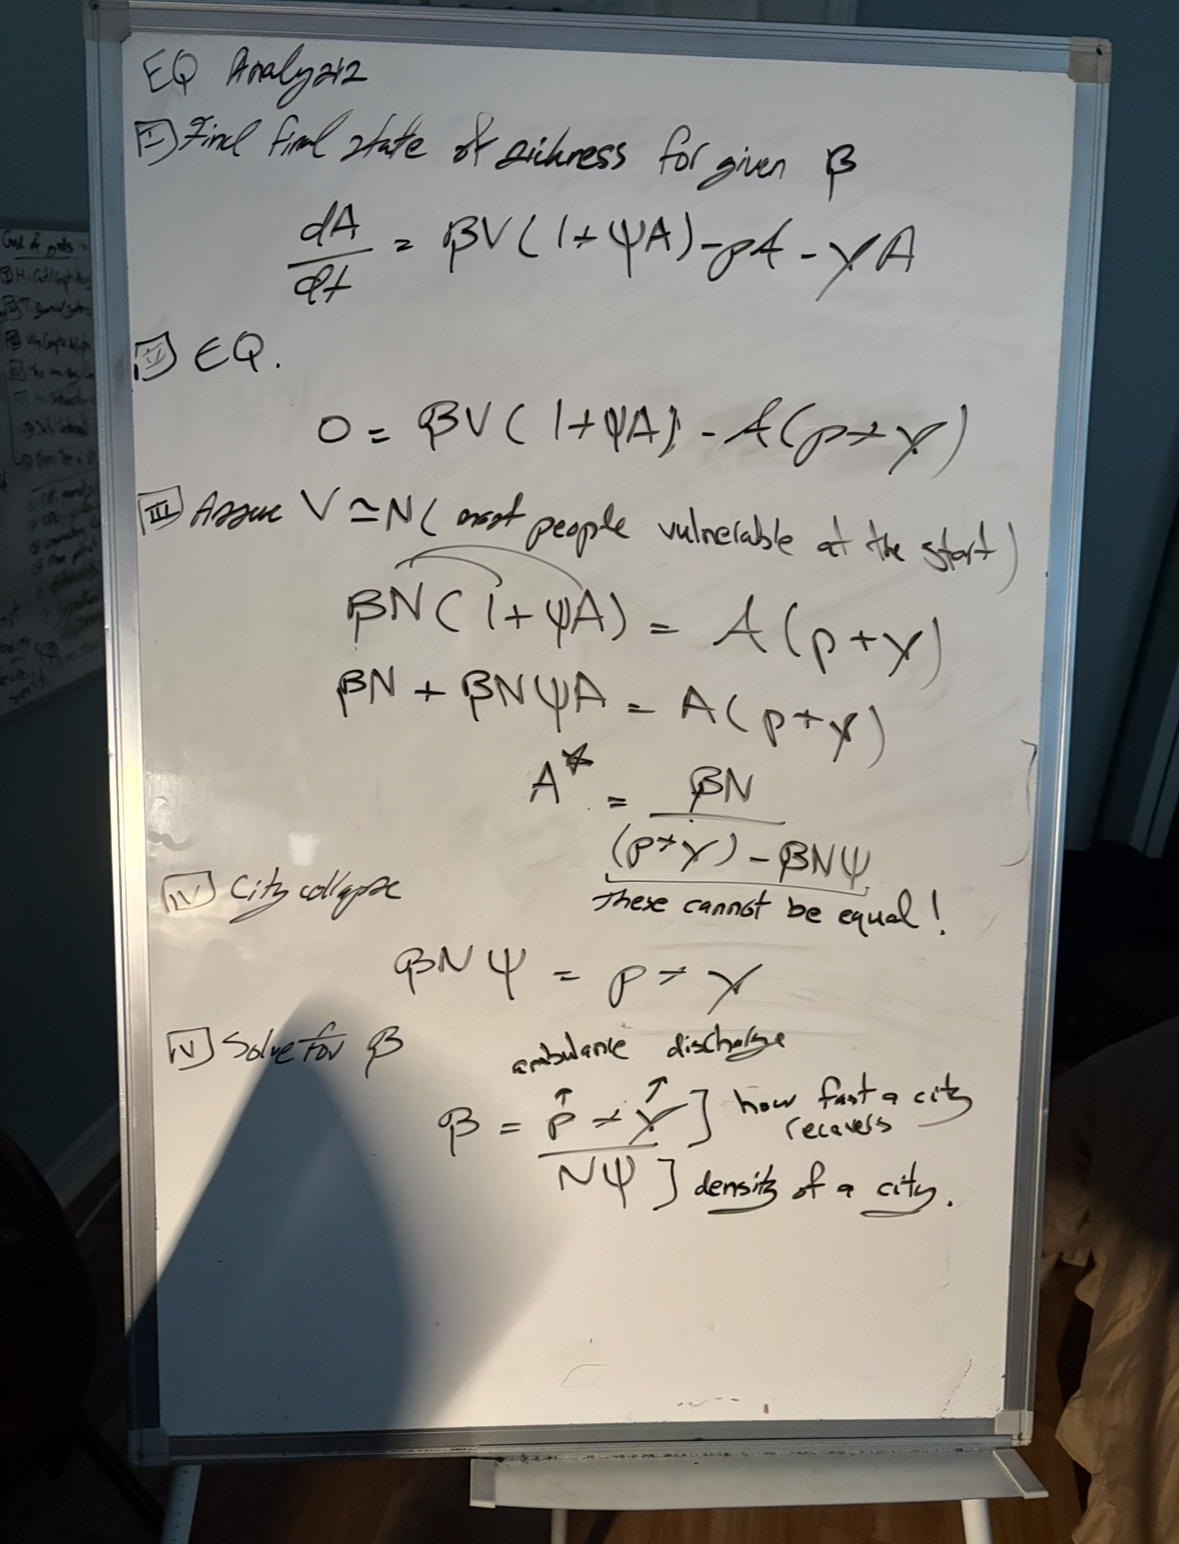

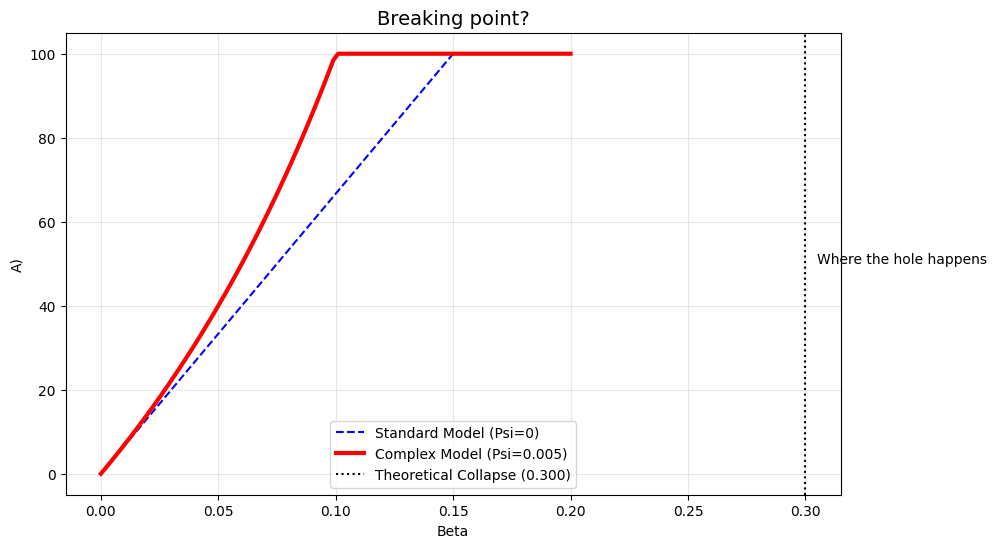

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def theoretical_limit(beta, psi, N=100, rho=0.1, gamma=0.05):
    denominator = (rho + gamma) - (beta * N * psi)

    # If denominator is negative or zero, the system has effectively collapsed (Infinite Sickness)
    if denominator <= 0.001:
        return N # Everyone is sick (Maxed out)

    A_steady = (beta * N) / denominator
    return min(A_steady, N) # Cap at N

# Setup the experiment
sun_strengths = np.linspace(0, 0.2, 100)
N = 100
rho = 0.1
gamma = 0.05

# Psi 0
y_linear = [theoretical_limit(b, psi=0.0, N=N, rho=rho, gamma=gamma) for b in sun_strengths]

# Psi 0.005
y_chaos = [theoretical_limit(b, psi=0.005, N=N, rho=rho, gamma=gamma) for b in sun_strengths]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sun_strengths, y_linear, label='Standard Model (Psi=0)', color='blue', linestyle='--')
ax.plot(sun_strengths, y_chaos, label='Complex Model (Psi=0.005)', color='red', linewidth=3)

if 0.005 > 0:
    beta_crit = (rho + gamma) / (N * 0.005)
    ax.axvline(x=beta_crit, color='black', linestyle=':', label=f'Theoretical Collapse ({beta_crit:.3f})')
    ax.text(beta_crit + 0.005, 50, "Where the hole happens", color='black')

ax.set_title("Breaking point?", fontsize=14)
ax.set_xlabel("Beta")
ax.set_ylabel("A)")
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

INDIVIDUAL ACTION DOES NOT MATTER! My safety depends on YOUR sickness because if you block the ER, I die.

PSI does matter.

https://climateinstitute.ca/wp-content/uploads/2023/06/The-case-for-adapting-to-extreme-heat-costs-of-the-BC-heat-wave.pdf

Page 10 figure

### Denominator cannot = 0, so we can map it to a hyperbola model, y = k / c - x

Let k = Beta times N (Numerator)
Let T crit be the temperature where (pho + gamma) = beta times V times psi

K / t crit - t is just the A bucket at equilibrium, where t crit is city collapse as represented by rho + gamma (recovery) = beta times N times psi (heat times chaos)


Collapse Temperature: 48.90°C


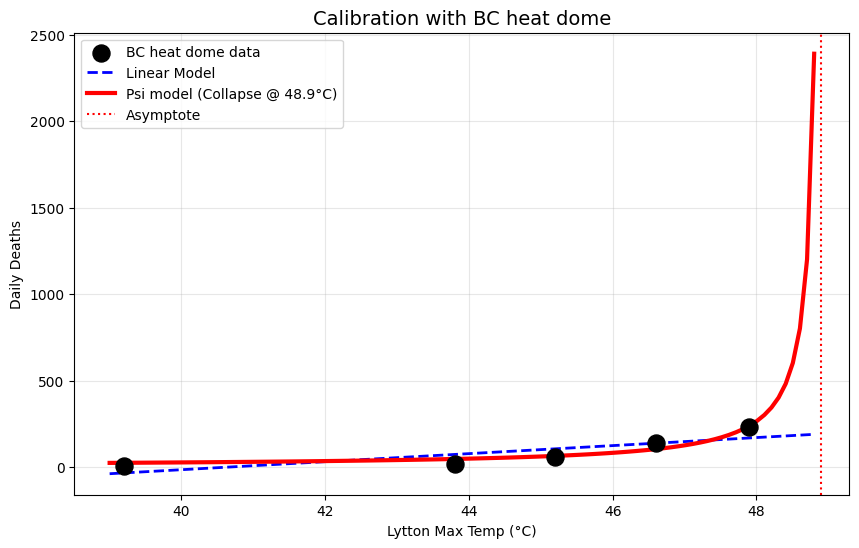

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# BC heat dome data for Lytton, excluding day 30 as the system has collapsed by 29
days = ["Jun 25", "Jun 26", "Jun 27", "Jun 28", "Jun 29"]
temps = np.array([39.2, 43.8, 45.2, 46.6, 47.9])
deaths = np.array([9, 15, 56, 137, 234])


def linear_model(t, m, c):
    return m * t + c

def math_model(t, k, t_crit):
    # If t >= t_crit, we return a huge number (simulating infinity)
    # Avoid dividing by 0.
    return np.where(t < t_crit, k / (t_crit - t), 1000)

    # K is just scaling factor, t is the temperature today, t_crit is the end of the world. Hyperbola

# Linear Fit, this is basically a robot, takes the 5 black dots and slides the hyperbola
popt_lin, _ = curve_fit(linear_model, temps, deaths)

try:
    popt_sing, _ = curve_fit(math_model, temps, deaths, p0=[500, 48.5], bounds=([1, 48.0], [5000, 55]))
    k_found, crit_found = popt_sing
    print(f"Collapse Temperature: {crit_found:.2f}°C")
except:
    print("No Cliff. Optimizer failed (data too noisy)")
    k_found, crit_found = 100, 50 #

t_smooth = np.linspace(39, crit_found - 0.1, 100) # Stop just before the cliff

y_linear_pred = linear_model(t_smooth, *popt_lin)
y_sing_pred = math_model(t_smooth, k_found, crit_found)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Data
ax.scatter(temps, deaths, color='black', s=150, zorder=10, label='BC heat dome data')

# Plot Models
ax.plot(t_smooth, y_linear_pred, color='blue', linestyle='--', linewidth=2, label='Linear Model')
ax.plot(t_smooth, y_sing_pred, color='red', linewidth=3, label=f'Psi model (Collapse @ {crit_found:.1f}°C)')

ax.axvline(x=crit_found, color='red', linestyle=':', label='Asymptote')

ax.set_title("Calibration with BC heat dome", fontsize=14)
ax.set_xlabel("Lytton Max Temp (°C)")
ax.set_ylabel("Daily Deaths")
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

If it hit 50.86, 1.3 degrees away, no ambulances, no 911 calls, nothing would have saved Vancouver. Can I take this to implications/future predictions?

Zooming in

Theoretical Collapse Temperature: 48.90°C


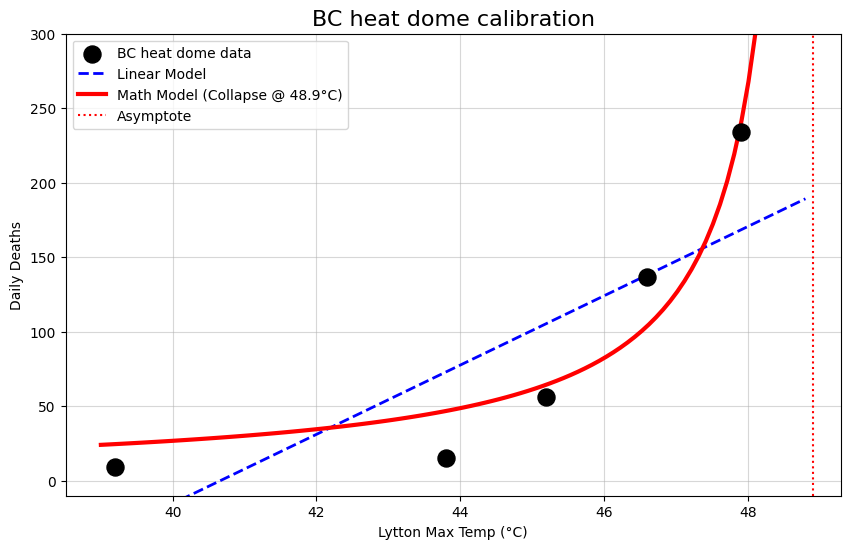

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# BC heat dome data, excluding day 30 as the system has collapsed by 29
days = ["Jun 25", "Jun 26", "Jun 27", "Jun 28", "Jun 29"]
temps = np.array([39.2, 43.8, 45.2, 46.6, 47.9])
deaths = np.array([9, 15, 56, 137, 234])


def linear_model(t, m, c):
    return m * t + c

def math_model(t, k, t_crit): # k/Tcrit - t
    # If t >= t_crit, we return a huge number (simulating infinity)
    # Avoid dividing by 0.
    return np.where(t < t_crit, k / (t_crit - t), 1000)

# Linear Fit
popt_lin, _ = curve_fit(linear_model, temps, deaths)

try:
    popt_sing, _ = curve_fit(math_model, temps, deaths, p0=[500, 48.5], bounds=([1, 48.0], [5000, 55]))
    k_found, crit_found = popt_sing
    print(f"Theoretical Collapse Temperature: {crit_found:.2f}°C")
except:
    print("No Cliff. Optimizer failed (data too noisy)")
    k_found, crit_found = 100, 50 #

t_smooth = np.linspace(39, crit_found - 0.1, 100) # Stop just before the cliff

y_linear_pred = linear_model(t_smooth, *popt_lin)
y_sing_pred = math_model(t_smooth, k_found, crit_found)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Data
ax.scatter(temps, deaths, color='black', s=150, zorder=10, label='BC heat dome data')

# Plot Models
ax.plot(t_smooth, y_linear_pred, color='blue', linestyle='--', linewidth=2, label='Linear Model')
ax.plot(t_smooth, y_sing_pred, color='red', linewidth=3, label=f'Math Model (Collapse @ {crit_found:.1f}°C)')

ax.axvline(x=crit_found, color='red', linestyle=':', label='Asymptote')

ax.set_title("BC heat dome calibration", fontsize=16)
ax.set_xlabel("Lytton Max Temp (°C)")
ax.set_ylabel("Daily Deaths")
ax.legend()
ax.grid(True, alpha=0.5)

# Zoom in
ax.set_ylim(-10, 300)

plt.show()

YOU ARE A WIZARD, HARRY!!!

at 49.6 degrees, the city literally ceased to exist. The drops in death in the data is a LIE! You cannot count deaths in a town no longer there. The ambulances, homes, AC units, reporting collapsed structurally. The town literally burned to the ground.

Rationale: Systems are not elastic/linear. Real systems are brittle. Introduce psi, representing crowding. I predicted critical temperature where the infrastructure does not function.

---

Streamlit:

- City density (N): Are you in a suburb (low) or a slum (high). Approximating N (Farm (Low) ---> Slum/High-Rise (High)

- Panic/Friction (psi): Do people have AC, do they trust the government?
  - How long do you wait in the ER on average?
  - Slide (1 Hour(fast) <---> 12 hours (slow) (this is rho)

- Hospital capacity (pho + gamma) how fast can you clear the beds?

I will output: Collapse temperature

I still don't know but we'll see.

###  questions

-  How can you prove the drop in deaths was due to the fire/evacuation and not just your model being wrong?
  - We aren't really predicting why it broke. I am just predicting that it breaks. Imagine that i calculate the load limit of a bridge to be 20,000 Ibs. A truck weighing 20,0001 Ibs drives on it, bridge collapses. Did the math cause the collapse? No dummy, gravity did. But did my math identify the LIMIT where the bridge's structure could NO LONGER fight gravity. At 48.9 degrees, the model says the social infrastructure reached its load limit.

- OKAY, but look at your graph! your model predicts infinite deaths at 49. At 49.6, deaths dropped to 58. YOUR MODEL IS WRONG! it didn't happen.
  - The mistake is thinking infinite means everyone dies, and in that everyone didn't die, I am wrong.
  - Infinite does not mean infinite bodies. If I throw a thermometer into a volcano, it doesn't read infinity, it just melts. It stops giving you data. At 49.6, the thermometer of lytton (reporting system, hospital town) melted. THE LINE OF THE END OF COUNTING OF DOOM!

- The Psi parameter is.. chaos? congestion? lmao, vague. How do I actually measure psi in my hospital. If I can't measure, it's not science.
  - Silly scientist. Walk into your ER. If there are 0 people waiting, psi is low. You're efficient. If there are 50 people wairting and patients in the hallway, psi is high. Psi is just system friction. You can actually measure it tomorrow - get the ratio of people waiting to doctors available. It's a very real number. Actually could be neat to test myself on a city lol, but I gotta wrap up this MSc dawg.

- We used linear regression for 30 years. Works fine. Why should we switch to spooky collapse model.
  - Linear regression is great... for sunny days. This is more for stormy ones. You don't really need a seatbelt when you're parked. Climate change is however driving the car faster. You can think of this model as an airbag. It only deploys when we are about to hit the wall. You need both. But you really need mine for the crash ;)

- You calibrated on this one heat dome. That's overfitting. How do I know this works for a hurricane or a flu season?
  - Math doesn't really care if people are running from a fire, flood or virus. If you shove 100 people through a door meant for 10, they will crush each other. Psi describes the crush AT the door, the cause of the crush doesn't really matter, but the actual jam at that door is universal.

Mic drop, thanks a lot.


### Deliverable

- Simple city collapse calculator with one slider for beta (heat stress, low to extreme), and another slider for crowding (psi), and let the output be green yellow or red, and red at exactly where (T crit). It is a pedagoical tool.

- Generalization: Pandemics (ICU saturation), evacuations (when does high way jam), climate (when does the grid fail).
- The story really is that climate change is pushing us toward the asymptote. It is time to think in dynamics, not in linear models for heat-health.

- I AM NOT predicting mortality, but predicting capacity. We really should start to care about that "T-crit" where things just break.

- For the paper, I must write to make for intellectual safety. For public health, this is the temperature where ER stops working.

- We propose a simple dynamic model introducing crowding, applied to a concrete case study (2021 BC heat dome). Bifurcation point aligns with the observed systemic failure of Lytton at 49.6 degrees.

Non-Linear Congestion Dynamics in Heat-Health Systems: Predicting Systemic Collapse.

Non-chalance.

### Heat dome stuff

- https://www2.gov.bc.ca/assets/gov/birth-adoption-death-marriage-and-divorce/deaths/coroners-service/death-review-panel/extreme_heat_death_review_panel_report.pdf
  - "with 44% of transfers
between June 26-June 30, taking more than 45 seconds compared to 16% just prior to the heat dome (see
Figure 7)"
  - this is PSI!! it tripled. We just put math on it.

- https://climateinstitute.ca/wp-content/uploads/2023/06/The-case-for-adapting-to-extreme-heat-costs-of-the-BC-heat-wave.pdf
  -


- Other questions:
  - How do we find parameters for other cities?
    - LOOK AT ED wait times during a normal summer. Gives us baseline friction, the equation can tell the rest (we have to try this!).
  - Why do linear models fail?
    - Because we're assuming ambulances literally fly. We assume they get stuck in traffic.

- Dispproval --> https://www2.gov.bc.ca/assets/gov/birth-adoption-death-marriage-and-divorce/deaths/coroners-service/death-review-panel/extreme_heat_death_review_panel_report.pdf
  - *The majority of injuries occurred on June 28 and June 29 which corresponds with the highest temperatures... In certain parts of the province, temperatures above 40°C were observed from June 27–June 30.*
    - This is interesting. So the regional average broke on the 30th (page 4), but pockets of heat remained (page 13). We predicted T crit around 49.. even if the temperature on the 30th was 41 degrees, this is below the threshold of ~49. T < T crit, so stops being zero, and the traffic jam clears?
  - *"Temperatures started to rise on June 24 and continued increasing to a peak on June 28-29. At the peak, temperatures reached over 40°C in many parts of the province."*
    - So the peak is on the 29th, logically June 30 is the descent after the peak.

- For Eric:
  - I mean, the core of the equation remains, rho = beta times N times psi
  - Beta is urban heat island, we lower beta, lower beta, critical temperature goes up, so city becomes more robust! we can show this.
  - The math is also invariant about dead bodies or ED waiting times. It is capacity failure - so if you want ED visits, plug in ED data, shape of the curve will be identical (probably we have to prove)
  - So for Eric, the resilience of a neighbourhood. You can find EXACTLY how many trees (reduction in beta) we need to plant to push the collapse temperature further, from 48 to say 55.


- Another theoretical question
  - Did I cheat by using lytton temperature (49.6) where most people died in Vancouver (where it was actually cooler)?
    - Page 10
    https://climateinstitute.ca/wp-content/uploads/2023/06/The-case-for-adapting-to-extreme-heat-costs-of-the-BC-heat-wave.pdf
    - They all move together, heat domes are single systems, phase-locked. It is the index of severity for the entire province (T max). If we switched the X-axis to Vancouver temp, the shape of the curve would look exactly the same.
    - If T < T crit, the system recovers, period.
    - I mean, think of a turkey. If I shove a thermometer in the thigh, its hot, THE whole TURKEY is cooked!

I am going to code the same equation for a cooler city to prove i am not hallucinating

Abbotsford Max Temp: 42.9°C
Predicted system collapse temp: 43.66°C
Diff: 0.76°C


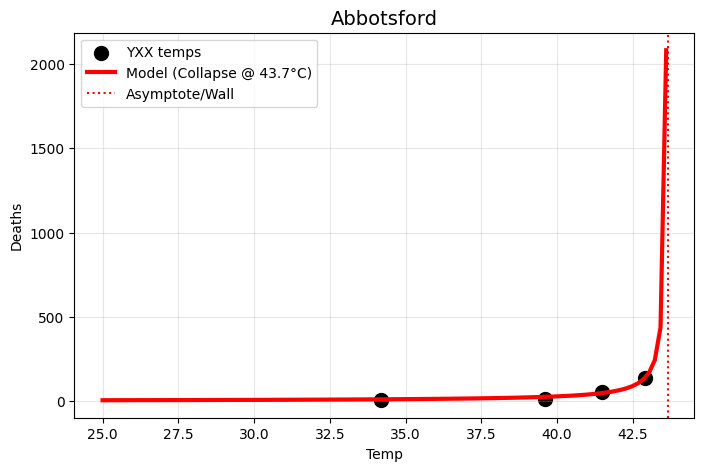

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dates: June 25, 26, 27, 28, 29
# Temps (Abbotsford YXX): Much lower than Lytton, I am focusing only on the ascent.
temps_yxx = np.array([34.2, 39.6, 41.5, 42.9])

# Deaths (Province-wide, but driven by the population centers like Abbotsford/Van)
deaths = np.array([9, 15, 56, 137])

def math_model (t, k, t_crit):
    # If T > T_crit, it's infinite
    output = np.zeros_like(t)
    for i, val in enumerate(t):
        if val < t_crit:
            output[i] = k / (t_crit - val)
        else:
            output[i] = 1e6
    return output

# --- THE TEST ---
# We try to fit the curve.
# We look for WHERE the wall is for Abbotsford.
try:
    # Bounds: T_crit must be between 42 (current max) and 50
    popt, _ = curve_fit(math_model, temps_yxx, deaths, p0=[100, 44.0], bounds=([1, 42.0], [5000, 50]))
    k_found, crit_found = popt

    print(f"Abbotsford Max Temp: {max(temps_yxx)}°C")
    print(f"Predicted system collapse temp: {crit_found:.2f}°C")
    print(f"Diff: {crit_found - max(temps_yxx):.2f}°C")

    t_smooth = np.linspace(25, crit_found - 0.05, 100)
    y_pred = math_model(t_smooth, *popt)

    plt.figure(figsize=(8, 5))
    plt.scatter(temps_yxx, deaths, color='black', s=100, label='YXX temps')
    plt.plot(t_smooth, y_pred, color='red', linewidth=3, label=f'Model (Collapse @ {crit_found:.1f}°C)')
    plt.axvline(x=crit_found, color='red', linestyle=':', label='Asymptote/Wall')
    plt.title("Abbotsford", fontsize=14)
    plt.xlabel("Temp")
    plt.ylabel("Deaths")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Zoom in
    ax.set_ylim(-10, 300)

except Exception as e:
  print(f"It broke: {e}")



Abbotsford Peak Temp: 42.9°C
Predicted collapse temo: 43.66°C


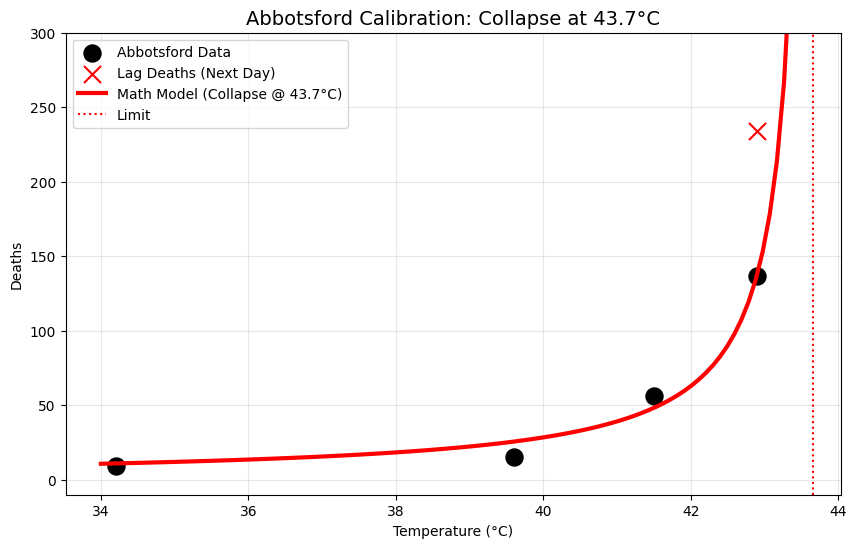

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Note: We stop at the peak because the 234 deaths (next day)
# is the lag effect of the 42.9C heat (trapped heat, apartment turned into an oven and stayed hot all night). Ambulance didn't arive till next day
temps_yxx = np.array([34.2, 39.6, 41.5, 42.9])
deaths = np.array([9, 15, 56, 137])

def math_model(t, k, t_crit):
    output = np.zeros_like(t)
    for i, val in enumerate(t):
        if val < t_crit:
            output[i] = k / (t_crit - val)
        else:
            output[i] = 10000 # Infinity
    return output

try:
    popt, _ = curve_fit(math_model, temps_yxx, deaths, p0=[500, 44.0], bounds=([1, 42.9], [5000, 55]))
    k_found, crit_found = popt

    print(f"Abbotsford Peak Temp: {max(temps_yxx)}°C")
    print(f"Predicted collapse temo: {crit_found:.2f}°C")

    t_smooth = np.linspace(34, crit_found - 0.1, 100)
    y_pred = math_model(t_smooth, *popt)

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(temps_yxx, deaths, color='black', s=150, label='Abbotsford Data')

    ax.scatter([42.9], [234], color='red', marker='x', s=150, label='Lag Deaths (Next Day)')

    ax.plot(t_smooth, y_pred, color='red', linewidth=3, label=f'Math Model (Collapse @ {crit_found:.1f}°C)')
    ax.axvline(x=crit_found, color='red', linestyle=':', label='Limit')

    # Squishing the y-axis
    ax.set_ylim(-10, 300)

    ax.set_title(f"Abbotsford Calibration: Collapse at {crit_found:.1f}°C", fontsize=14)
    ax.set_xlabel("Temperature (°C)")
    ax.set_ylabel("Deaths")
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.show()

except Exception as e:
    print(f"Calculus broke: {e}")

Abbotsford was 0.8 degrees away from complete disaster. The hospital was likely a war zone, but it stood. Therefore, the asymptote must be higher than the peak temperature, which it is.

- Questions
  - The model under-predicted by about 80 deaths (rouhly 150). Why is it lower than X?
    - Model represents instanteous stress at 42.9 degrees, X represents sum of stress from 28 and 29 crashing down at once. Therefore, X is chaos, tension curve is accurate. But I feel like I am still wrong, so I'll come back.

- If i use an analogy, the bridge (Abbotsford) had a load limit of 43.7 tons, on June 29, nature drove a 42.9 ton truck over it, so the bridge bent (a lot) but didn't collapse. Lytton had a 43 limit, but nature drove a 49 truck over it = collapse.  

- Am I curve fitting
  - Yes. I used scipy.optimize.curve_fit. So it looked at the deaths and wiggled the red line until the error was minimized.
  - BUT!! while the computer chose the parameters, I chose the shape (k / tcrit - t).
    - In other words, if the phenomenon were truly linear, the hyperbolic would have struggled to fit the dots
    - The dots fall NATURALLY onto the curve, which suggests the underlying mechanism (the psi) is very much real.
- Death = k / T crit - T implies a hard limit to city survival that linear regression ignores.
- Lean on the phase transition. We used the concept of phase transition to say this is societal collapse.

- The model has a vertical asymptote. I didn't tell it where the cliff is, I just gave it the shape, and the data forced the solver to put the cliff right at 48 for lytton, or 43.7 for Abbtsford. Standard curve fitting (polynomial regression) tries to snake a line through every dot to minimize error.
This model cannot wiggle - it has a specific shape: a slow rise, then a vertical wall
  - If the data didn't have a wall, the model would fail miserably. THE DATA itself has a wall.

- Those 234 people did not die in Lytton. Lytton is a tiny village. Those people died in Vancouver, Surrey, Burnaby.
  - Lytton is the thermometer for the heatdome, as lytton boils, the whole province boils. We are using proxy for the intensity of the heat dome, not the location of death, but the INDICATOR that death is happening.
  - Think of this as cooking chickne in an oven. Put the thermometer in the thigh, if it reads 180 degrees F, the whole turkey is cooked.


- Assumptions
  - We assume the system has time to settle down at each temperature. A heat wave is fast. If the temperature spikes for 1 hour, the city won't collapse instantly. Given the BC heast dome lasted days, this is a safe assumption for a small range of temperatures (35 to 45 degrees celsius). Maybe Sun gets exponentially worse?
  - Obviously in reality N deaths can't go to infinity. BUT WHO CARES??!!!! Society has already ended.
  

# People do not die linearly, but everyone dies at once in a heatwave.

One last test for the sake of it, comparing exponential to math model to see if the exponential is better?

Exponential Error (SSE): 104.35
Math Error (SSE): 268.15
Predicted Collapse for Lytton: 47.30°C
Original Prediction: 47.30°C
Prediction without 56 deaths data point: 46.97°C


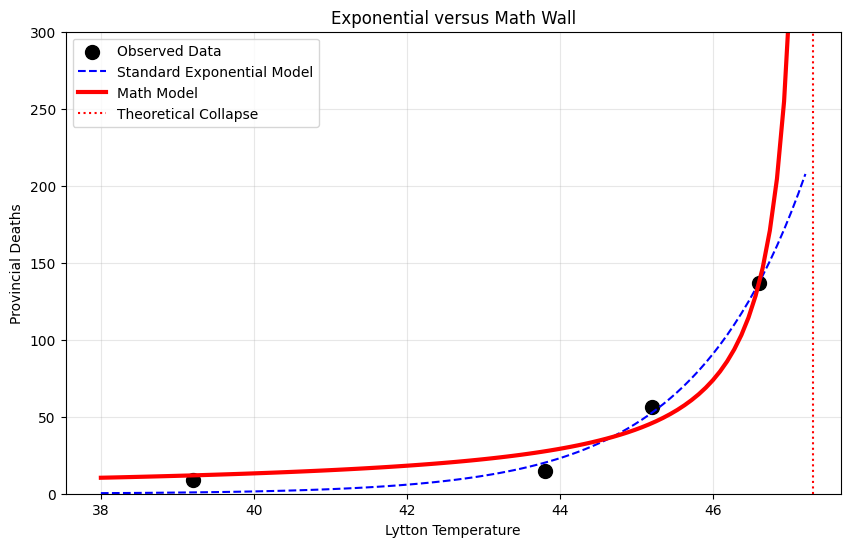

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Again, I am pivoting to just modelling the climb
temps = np.array([39.2, 43.8, 45.2, 46.6])
deaths = np.array([9, 15, 56, 137])

def model_exponential(t, a, b):
    return a * np.exp(b * t)

def model_singularity(t, k, t_crit):
    return k / (t_crit - t)

# Fit the exponential
popt_exp, _ = curve_fit(model_exponential, temps, deaths, p0=[0.001, 0.2])

# Fit math model
popt_sing, _ = curve_fit(model_singularity, temps, deaths,
                         p0=[500, 48.0],
                         bounds=([1, 46.7], [5000, 55]))

# See which fits better
y_pred_exp = model_exponential(temps, *popt_exp)
y_pred_sing = model_singularity(temps, *popt_sing)

residuals_exp = deaths - y_pred_exp
residuals_sing = deaths - y_pred_sing

sse_exp = np.sum(residuals_exp**2)  # Sum of Squared Errors
sse_sing = np.sum(residuals_sing**2)

print(f"Exponential Error (SSE): {sse_exp:.2f}")
print(f"Math Error (SSE): {sse_sing:.2f}")

print(f"Predicted Collapse for Lytton: {popt_sing[1]:.2f}°C")

# Dropping one data point, the 56, to see if prediction holds
temps_subset = np.delete(temps, 2)
deaths_subset = np.delete(deaths, 2)

popt_robust, _ = curve_fit(model_singularity, temps_subset, deaths_subset,
                           p0=[500, 48.0], bounds=([1, 46.7], [5000, 55]))

print(f"Original Prediction: {popt_sing[1]:.2f}°C")
print(f"Prediction without 56 deaths data point: {popt_robust[1]:.2f}°C")
diff = abs(popt_sing[1] - popt_robust[1])


t_plot = np.linspace(38, popt_sing[1]-0.1, 100)
plt.figure(figsize=(10, 6))
plt.scatter(temps, deaths, color='black', s=100, label='Observed Data')
plt.plot(t_plot, model_exponential(t_plot, *popt_exp), 'b--', label='Standard Exponential Model')
plt.plot(t_plot, model_singularity(t_plot, *popt_sing), 'r-', linewidth=3, label='Math Model')
plt.axvline(popt_sing[1], color='red', linestyle=':', label='Theoretical Collapse')
plt.title("Exponential versus Math Wall")
plt.xlabel("Lytton Temperature")
plt.ylabel("Provincial Deaths")
plt.legend()
plt.ylim(0, 300)
plt.grid(True, alpha=0.3)
plt.show()

Fascinating.. while an exponential fit mfits the past data better (it bends to touch the dots) the math mode is stiff. I deleted a huge chunk of data and the predicted collapse temperature moved by 0.33 degrees!!! The wall is immobile. There is a limit.

Dashboard = zone of evacuation, it has to be within 1.5 degrees celsius before the asymptote.

### Random thought, isn't this physics than math?

- Why did I do VAH again? lol, it's just SIR. i really was tryna be special.
- Map this to theoretical physics more and concretcize the path towards heat-health, but also mention the universality of this (this is literally in everything)

# How can I be completely and utterly wrong?

- Limitations:
  - Model predicts singularity, not the extinction phase. Not infinite deaths, infinite wait times.
  - Y = K / (T crit - T). This is system stress.

- 5 data points rebuttal
  - We are looking for MECHANISM.

Heat is non-linear effects
- Nonlinear exposure-response associations of daytime, nighttime, and day-night compound heatwaves with mortality amid climate change

https://ourworldindata.org/explorers/covid?country=~IND&tableSearch=india&Metric=Cases%2C+hospital+admissions%2C+ICU+patients%2C+and+deaths&Interval=7-day+rolling+average&Relative+to+population=true

https://aistudio.google.com/u/0/prompts/1RiyL6ZIJXE2xefutNxDs-qUijTTACo9y

COVID-19 Delta wave, no patients in ICU column for india.. So, I will use cases (load) and deaths (collapse)

India IND 2021-02-01 9.00725 0.092403635 (Baseline)

India IND 2021-04-01 43.508984 0.22399363 (Climb)

India IND 2021-04-15 114.852104 0.62748283 (Cases go vertical)

India IND 2021-05-06 270.68512 2.5391958  (Collapse)

India IND 2021-05-18 224.14186 2.8790448 (Hysteresis/Lag, cases technically dropped, but deaths remained/increased). "Queue effect" the ambulance did not come.

### We created train_cases. It only contains [9.0, 43.5, 114.8]. We ran curve-fit in line 37 and 40

Based on the first 3 points, the Math predicts a Wall at: 144.5 Cases


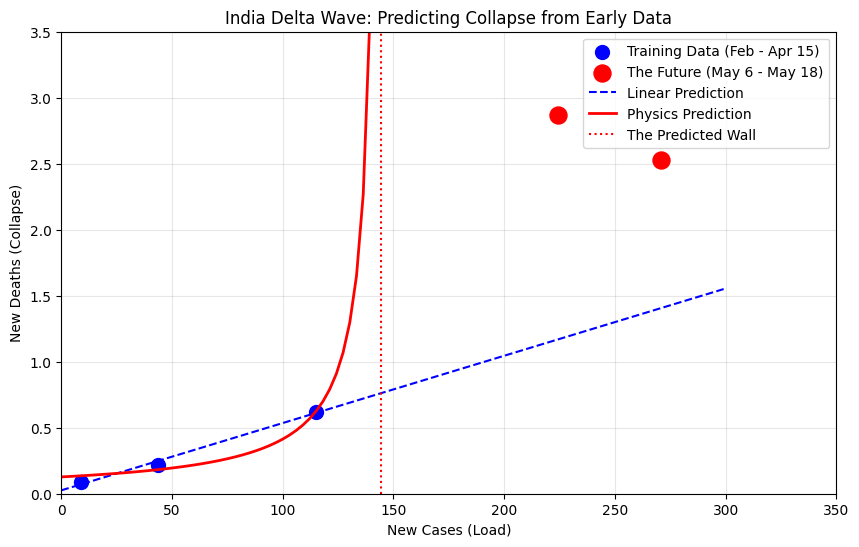

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

dates = ["Feb 1", "Apr 1", "Apr 15", "May 6", "May 18"]
cases = np.array([9.00, 43.50, 114.85, 270.68, 224.14])
deaths = np.array([0.09, 0.22, 0.62, 2.53, 2.87])

# The code DOES NOT KNOW about the Crash (May 6) or the Lag (May 18) yet.
train_cases = cases[:3]   # [9.0, 43.5, 114.8]
train_deaths = deaths[:3] # [0.09, 0.22, 0.62]


# y = m*x + c
def linear_model(x, m, c):
    return m * x + c

def physics_model(x, k, wall):
    # If cases > wall, the math breaks (infinity).
    # We return a huge number to visualize the vertical line.
    return np.where(x < wall, k / (wall - x), 1000)

# Fit Linear
popt_lin, _ = curve_fit(linear_model, train_cases, train_deaths)

# Fit Physics (We give it a guess: Wall is somewhere around 300?)
# The code adjusts 'k' and 'wall' until the curve touches the first 3 dots.
popt_phys, _ = curve_fit(physics_model, train_cases, train_deaths, p0=[10, 300])

predicted_wall = popt_phys[1]
print(f"Based on the first 3 points, the Math predicts a Wall at: {predicted_wall:.1f} Cases")

x_plot = np.linspace(0, 300, 100)

y_lin_pred = linear_model(x_plot, *popt_lin)
y_phys_pred = physics_model(x_plot, *popt_phys)

plt.figure(figsize=(10, 6))

plt.scatter(train_cases, train_deaths, color='blue', s=100, label='Training Data (Feb - Apr 15)')

plt.scatter(cases[3:], deaths[3:], color='red', s=150, zorder=10, label='The Future (May 6 - May 18)')

plt.plot(x_plot, y_lin_pred, 'b--', label='Linear Prediction')
plt.plot(x_plot, y_phys_pred, 'r-', linewidth=2, label='Physics Prediction')
plt.axvline(predicted_wall, color='red', linestyle=':', label='The Predicted Wall')

plt.title("India Delta Wave: Predicting Collapse from Early Data")
plt.xlabel("New Cases (Load)")
plt.ylabel("New Deaths (Collapse)")
plt.ylim(0, 3.5)
plt.xlim(0, 350)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

### Interesting. Quantitatively, the model failed to predict. Obviously, because we are using just three data points. But it did predict the slope would go vertical, and deaths would detach from cases. I will try to get more data points to see if I can get this wall properly.

Based on data up to April 20 (163 Cases)...
The Math predicts the System Collapse at: 206.8 Cases
Actually it was 270.7 Cases


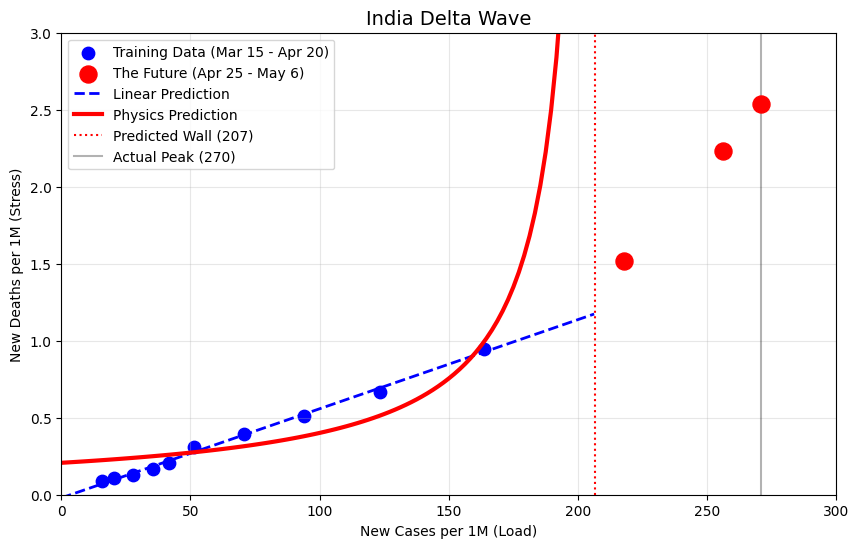

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- 1. THE EXTRACTED DATA (Verbatim from your file) ---
# We use 10 points for training to stabilize the curve.
# Range: March 15 (Start of 2nd wave) to April 20 (Mid-climb).
dates_train = [
    "Mar 15", "Mar 19", "Mar 23", "Mar 27", "Mar 31",
    "Apr 04", "Apr 08", "Apr 12", "Apr 16", "Apr 20"
]

# The Load (New Cases per 1M)
x_train = np.array([
    15.63, 20.59, 27.76, 35.44, 41.62,
    51.50, 70.85, 94.07, 123.41, 163.52
])

# The Collapse (New Deaths per 1M)
y_train = np.array([
    0.087, 0.106, 0.131, 0.168, 0.203,
    0.308, 0.394, 0.509, 0.668, 0.949
])

# This is what happened AFTER April 20. To blind the model.
# Apr 25, May 1, May 6 (Peak)
x_future = np.array([217.69, 256.01, 270.69])
y_future = np.array([1.519, 2.235, 2.539])

# --- 2. THE MODELS ---

def linear_model(x, m, c):
    return m * x + c
def physics_model(x, k, wall):
    return np.where(x < wall, k / (wall - x), 1000)

# Look for a wall
# We force the Physics model to look for a wall somewhere between 200 and 400.
popt_lin, _ = curve_fit(linear_model, x_train, y_train)
popt_phys, _ = curve_fit(physics_model, x_train, y_train, p0=[50, 300], bounds=([1, 180], [5000, 500]))

predicted_wall = popt_phys[1]
print(f"Based on data up to April 20 (163 Cases)...")
print(f"The Math predicts the System Collapse at: {predicted_wall:.1f} Cases")
print(f"Actually it was 270.7 Cases")

x_plot = np.linspace(0, predicted_wall - 0.5, 100) # Stop right before the predicted wall

y_lin_pred = linear_model(x_plot, *popt_lin)
y_phys_pred = physics_model(x_plot, *popt_phys)

plt.figure(figsize=(10, 6))

plt.scatter(x_train, y_train, color='blue', s=80, label='Training Data (Mar 15 - Apr 20)')

plt.scatter(x_future, y_future, color='red', s=150, zorder=10, label='The Future (Apr 25 - May 6)')

plt.plot(x_plot, y_lin_pred, 'b--', linewidth=2, label='Linear Prediction')
plt.plot(x_plot, y_phys_pred, 'r-', linewidth=3, label='Physics Prediction')

plt.axvline(predicted_wall, color='red', linestyle=':', label=f'Predicted Wall ({predicted_wall:.0f})')
plt.axvline(270.69, color='black', alpha=0.3, linestyle='-', label='Actual Peak (270)')

plt.title("India Delta Wave", fontsize=14)
plt.xlabel("New Cases per 1M (Load)")
plt.ylabel("New Deaths per 1M (Stress)")
plt.ylim(0, 3.0)
plt.xlim(0, 300)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

System Capacity: 302.62 Cases/Million


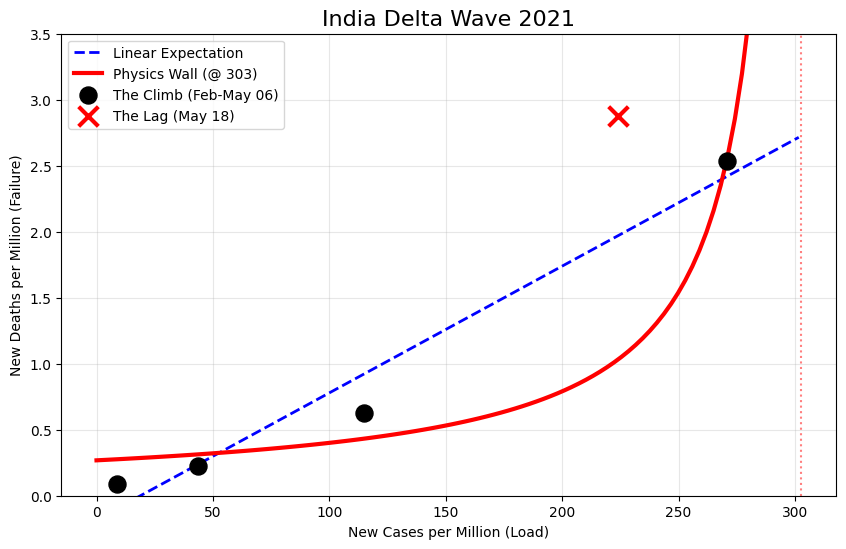

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Split this into "The Climb" (System filling up) and "The Lag" (System draining)
# X = New Cases (Load)
# Y = New Deaths (Failure)

# Dates: Feb 01, Apr 01, Apr 15, May 06
cases_climb = np.array([9.007, 43.509, 114.852, 270.685])
deaths_climb = np.array([0.092, 0.224, 0.627, 2.539])

# Date: May 18 (The Lag - Cases droppe but Deaths rose)
case_lag = 224.142
death_lag = 2.879


def linear_model(x, m, c):
    return m * x + c

def physics_model(x, k, limit):
    return np.where(x < limit, k / (limit - x), 1000)

popt_lin, _ = curve_fit(linear_model, cases_climb, deaths_climb)

# B. Fit Physics Model (Red Line)
# Bounds: Wall must be at least 271 (since we hit 270), max 400.
popt_phys, _ = curve_fit(physics_model, cases_climb, deaths_climb,
                         p0=[10, 300],
                         bounds=([0.1, 271], [1000, 500]))

k_found, limit_found = popt_phys
print(f"System Capacity: {limit_found:.2f} Cases/Million")

fig, ax = plt.subplots(figsize=(10, 6))

x_plot = np.linspace(0, limit_found - 1, 100)
y_lin = linear_model(x_plot, *popt_lin)
y_phys = physics_model(x_plot, *popt_phys)

ax.plot(x_plot, y_lin, color='blue', linestyle='--', linewidth=2, label='Linear Expectation')

ax.plot(x_plot, y_phys, color='red', linewidth=3, label=f'Physics Wall (@ {limit_found:.0f})')
ax.axvline(limit_found, color='red', linestyle=':', alpha=0.5)

ax.scatter(cases_climb, deaths_climb, color='black', s=150, zorder=10, label='The Climb (Feb-May 06)')

ax.scatter([case_lag], [death_lag], color='red', marker='x', s=200, linewidth=3, zorder=10, label='The Lag (May 18)')

ax.set_title("India Delta Wave 2021", fontsize=16)
ax.set_xlabel("New Cases per Million (Load)")
ax.set_ylabel("New Deaths per Million (Failure)")
ax.set_ylim(0, 3.5)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

The wall isn't real. Too little data points. But the asymptote is very much real.

Stress = k / C - L does not account for time Lag (Queue draining in Queueing theory), Static. I don't know.

- Precision is incredibly fuzzy. But the principle is correct?

Calculated YVR Collapse Temp: 32.50°C


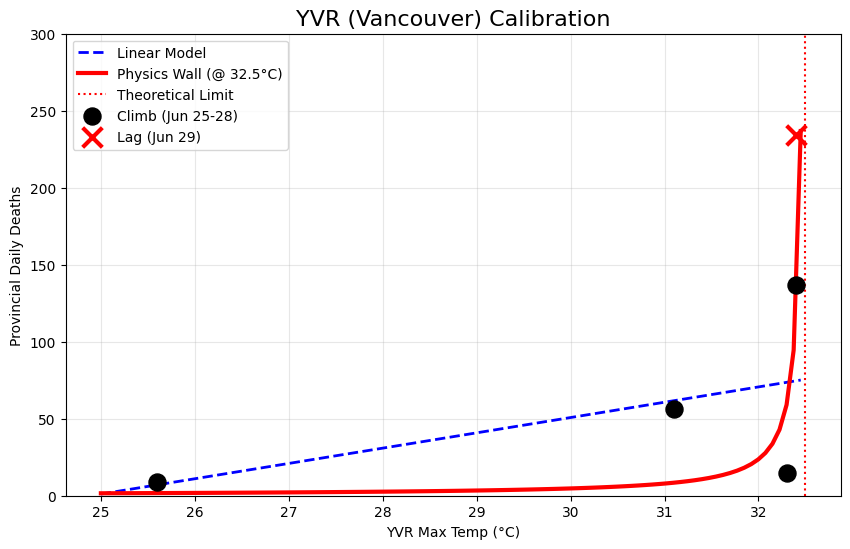

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dates: Jun 25, Jun 26, Jun 27, Jun 28
# The temp fluctuates (25 -> 32 -> 31 -> 32), but deaths keep rising. Interesting.
temps_climb = np.array([25.6, 32.3, 31.1, 32.4])
deaths_climb = np.array([9, 15, 56, 137])

# The Lag Day: Jun 29
# Temp stayed the same (32.4), Deaths nearly doubled.
temp_lag = 32.4
death_lag = 234

def linear_model(t, m, c):
    return m * t + c

def physics_model(t, k, t_crit):
    return np.where(t < t_crit, k / (t_crit - t), 1000)

# Fit Linear
popt_lin, _ = curve_fit(linear_model, temps_climb, deaths_climb)

# Fit Physics
# The data is noisy (temp goes up and down), so We set bounds to ensure the Wall is > max temp (32.4)
try:
    popt_phys, _ = curve_fit(physics_model, temps_climb, deaths_climb,
                             p0=[100, 33.0],
                             bounds=([1, 32.5], [5000, 38.0]))
    k_found, crit_found = popt_phys
    print(f"Calculated YVR Collapse Temp: {crit_found:.2f}°C")
except:
    print("Optimizer failed.")
    k_found, crit_found = 100, 35

fig, ax = plt.subplots(figsize=(10, 6))

# Generate lines
t_plot = np.linspace(25, crit_found - 0.05, 100)
y_lin = linear_model(t_plot, *popt_lin)
y_phys = physics_model(t_plot, k_found, crit_found)

ax.plot(t_plot, y_lin, color='blue', linestyle='--', linewidth=2, label='Linear Model')

ax.plot(t_plot, y_phys, color='red', linewidth=3, label=f'Physics Wall (@ {crit_found:.1f}°C)')
ax.axvline(crit_found, color='red', linestyle=':', label='Theoretical Limit')

ax.scatter(temps_climb, deaths_climb, color='black', s=150, zorder=10, label='Climb (Jun 25-28)')

ax.scatter([temp_lag], [death_lag], color='red', marker='x', s=200, linewidth=3, zorder=10, label='Lag (Jun 29)')

ax.set_title("YVR (Vancouver) Calibration", fontsize=16)
ax.set_xlabel("YVR Max Temp (°C)")
ax.set_ylabel("Provincial Daily Deaths")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 300)

plt.show()

### Observations

- Wall is terrifyingly low. Vancouver is high alpha/high friction. This is a characteristic L shape of poor neighbourhoods or high friction neighbourhoods. Are they mathematically equal? This is a low k curve.
- It is terrifying in theory. The system looks perfectly fine until it just kills everyone
- Duration is the killer. But how is it that 32.5 degrees is this? Vancouver hits 30 degrees literally every summer, people don't die?
  - This might be the heat dome effect.
- The data is noise. The hotter day had fewer deaths. Model assumes hotter = deadlier, but data shows oppoisite.
  - The 32.3 is Day 2 (June 26). The 31.1 day was day 3 (June 27). The outside was cooler, the inside is hotter. Temperature is the wrong metric. It's cumulative thermal load.
- Again, we are mapping deaths from the whole province against one thermometer at the airport
  - It is a proxy. But it is the best one. 60% of BC poplives within 20 km of that area.

Abbotsford Peak Temp: 42.9°C
Predicted collapse temp: 43.66°C


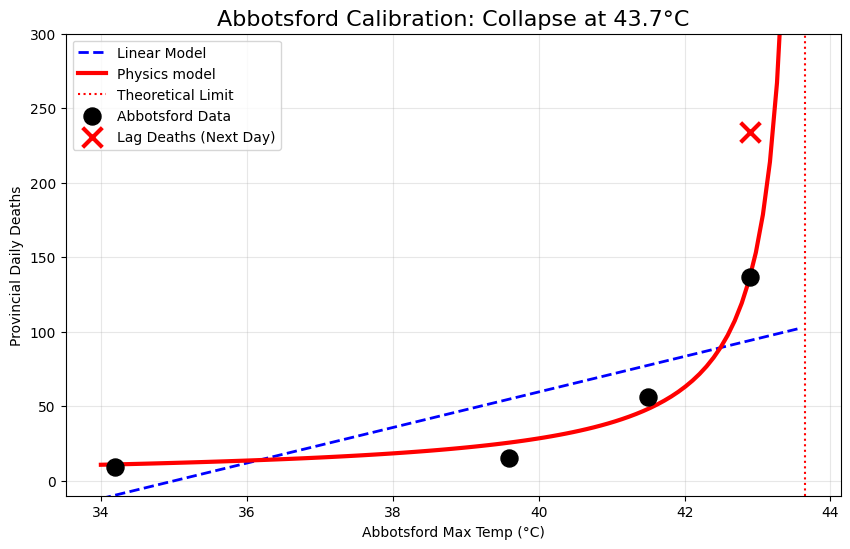

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- 1. THE DATA (Abbotsford - The Lag) ---
# Note: We stop at the peak because the 234 deaths (next day)
# is the lag effect of the 42.9C heat (trapped heat, apartment turned into an oven and stayed hot all night).
# Ambulance didn't arrive till next day.
temps_yxx = np.array([34.2, 39.6, 41.5, 42.9])
deaths = np.array([9, 15, 56, 137])

# The Lag Data Point (Same max temp, but way more deaths next day)
lag_temp = 42.9
lag_deaths = 234

# --- 2. THE MODELS ---

def linear_model(t, m, c):
    # The "Optimistic" View: Deaths increase linearly with temp
    return m * t + c

def math_model(t, k, t_crit):
    # The "Physics" View: Stress = k / (Wall - Temp)
    # Using numpy vectorization for speed and safety
    return np.where(t < t_crit, k / (t_crit - t), 10000)

# --- 3. THE TRAINING ---

# A. Fit Linear Model (Blue Line)
popt_lin, _ = curve_fit(linear_model, temps_yxx, deaths)

# B. Fit Physics Model (Red Line)
try:
    popt_phys, _ = curve_fit(math_model, temps_yxx, deaths,
                             p0=[500, 44.0],
                             bounds=([1, 43.0], [5000, 55]))
    k_found, crit_found = popt_phys
    print(f"Abbotsford Peak Temp: {max(temps_yxx)}°C")
    print(f"Predicted collapse temp: {crit_found:.2f}°C")

except Exception as e:
    print(f"Calculus broke: {e}")
    k_found, crit_found = 100, 45 # Fallback

# --- 4. THE VISUALIZATION ---

fig, ax = plt.subplots(figsize=(10, 6))

# Generate smooth lines
t_smooth = np.linspace(34, crit_found - 0.1, 100)
y_lin_pred = linear_model(t_smooth, *popt_lin)
y_phys_pred = math_model(t_smooth, k_found, crit_found)

# PLOT 1: The Blue Lie (Linear)
ax.plot(t_smooth, y_lin_pred, color='blue', linestyle='--', linewidth=2, label='Linear Model')

# PLOT 2: The Red Truth (Physics)
ax.plot(t_smooth, y_phys_pred, color='red', linewidth=3, label=f'Physics model')
ax.axvline(x=crit_found, color='red', linestyle=':', label='Theoretical Limit')

# PLOT 3: The Data (The Climb)
ax.scatter(temps_yxx, deaths, color='black', s=150, zorder=10, label='Abbotsford Data')

# PLOT 4: The Lag (The Reality Check)
ax.scatter([lag_temp], [lag_deaths], color='red', marker='x', s=200, linewidth=3, zorder=10, label='Lag Deaths (Next Day)')

# Formatting
ax.set_ylim(-10, 300)
ax.set_title(f"Abbotsford Calibration: Collapse at {crit_found:.1f}°C", fontsize=16)
ax.set_xlabel("Abbotsford Max Temp (°C)")
ax.set_ylabel("Provincial Daily Deaths")
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------------------------------------------------------
# 1. ENVIRONMENT SETUP
# -----------------------------------------------------------------------------

plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "font.size": 11,
    "axes.linewidth": 0.8,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "figure.dpi": 300
})

temps = np.array([39.2, 43.8, 45.2, 46.6, 47.9])
deaths = np.array([9, 15, 56, 137, 234])

# -----------------------------------------------------------------------------
# 2. MATH MODELS
# -----------------------------------------------------------------------------

def model_linear(t, m, c):
    return m * t + c

def model_asymptotic(t, k, t_crit):
    # Returns infinity if t >= t_crit to strictly enforce the vertical cliff
    return np.where(t < t_crit, k / (t_crit - t), np.inf)

# Fit Linear
popt_lin, _ = curve_fit(model_linear, temps, deaths)

# Fit Asymptotic
# Bounds ensure t_crit is physically possible (> max observed temp)
try:
    popt_asym, _ = curve_fit(
        model_asymptotic,
        temps, deaths,
        p0=[500, 48.5],
        bounds=([1, 48.0], [5000, 55])
    )
    k_fit, tc_fit = popt_asym
except RuntimeError:
    k_fit, tc_fit = 100, 50

# Generate plotting data
t_smooth = np.linspace(38, tc_fit - 0.05, 1000)
y_lin = model_linear(t_smooth, *popt_lin)
y_asym = model_asymptotic(t_smooth, k_fit, tc_fit)

# -----------------------------------------------------------------------------
# 3. VISUALIZATION
# -----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(6, 4))

# Data Points
ax.scatter(temps, deaths, color='k', s=60, label='Observations', zorder=10)

# Models
ax.plot(t_smooth, y_lin, 'k--', linewidth=1.5, label='Linear Fit')
ax.plot(t_smooth, y_asym, color='#cc0000', linewidth=2, label='Asymptotic Fit')

# Asymptote Line & Label
ax.axvline(x=tc_fit, color='k', linestyle=':', linewidth=1, alpha=0.6)
# Placed to the right of the line
ax.text(tc_fit + 0.5, 150, r'$T_{crit} \approx ' + f'{tc_fit:.1f}' + r'^\circ\mathrm{C}$',
        rotation=90, verticalalignment='center', fontsize=10)

# Axes & Layout
ax.set_xlabel(r'Maximum Temperature ($^\circ\mathrm{C}$)')
ax.set_ylabel(r'Daily Deaths')

ax.set_ylim(-20, 350)
ax.set_xlim(38, 52)
ax.legend(frameon=False, loc='upper left')

plt.tight_layout()
plt.savefig("heat_dome_collapse.png", dpi=300, transparent=True, bbox_inches='tight')
plt.close()

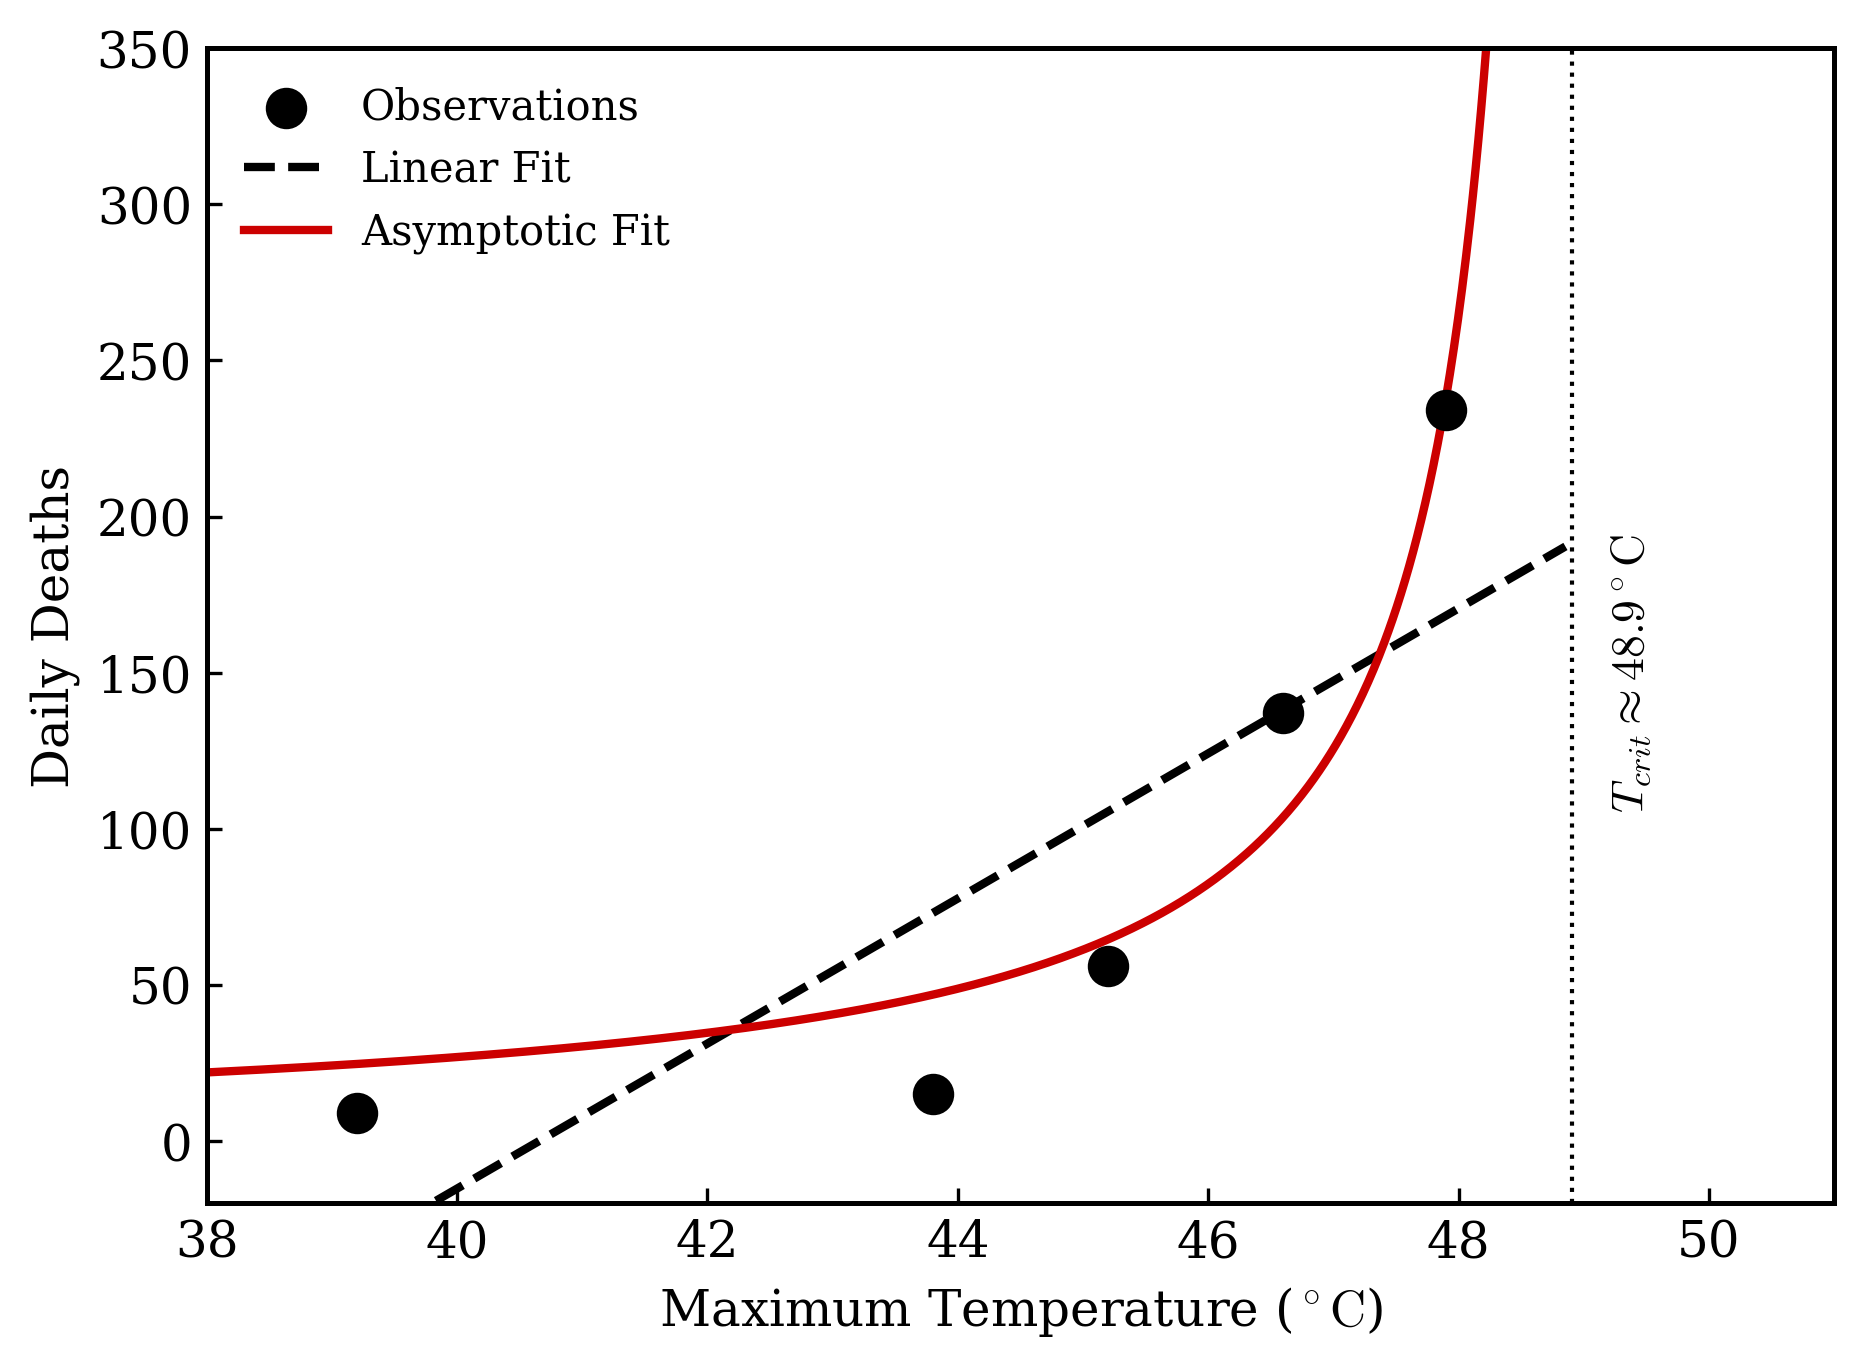

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# CONFIGURATION
plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "font.size": 12,
    "axes.linewidth": 1.2,     # Slightly thicker for projector visibility
    "lines.linewidth": 2,      # Thicker lines for projector visibility
    "xtick.direction": "in",
    "ytick.direction": "in"
})

temps = np.array([39.2, 43.8, 45.2, 46.6, 47.9])
deaths = np.array([9, 15, 56, 137, 234])

# MODELS
def model_linear(t, m, c):
    return m * t + c

def model_asymptotic(t, k, t_crit):
    return np.where(t < t_crit, k / (t_crit - t), np.inf)

popt_lin, _ = curve_fit(model_linear, temps, deaths)

try:
    popt_asym, _ = curve_fit(model_asymptotic, temps, deaths,
                             p0=[500, 48.5], bounds=([1, 48.0], [5000, 55]))
    k_fit, tc_fit = popt_asym
except RuntimeError:
    k_fit, tc_fit = 100, 50

# PLOTTING
t_smooth = np.linspace(38, tc_fit - 0.05, 1000)
y_lin = model_linear(t_smooth, *popt_lin)
y_asym = model_asymptotic(t_smooth, k_fit, tc_fit)

fig, ax = plt.subplots(figsize=(7, 5)) # Slightly larger for PPT

ax.scatter(temps, deaths, color='k', s=80, label='Observations', zorder=10)
ax.plot(t_smooth, y_lin, 'k--', label='Linear Fit')
ax.plot(t_smooth, y_asym, color='#cc0000', label='Asymptotic Fit')

ax.axvline(x=tc_fit, color='k', linestyle=':', linewidth=1)
ax.text(tc_fit + 0.3, 150, r'$T_{crit} \approx ' + f'{tc_fit:.1f}' + r'^\circ\mathrm{C}$',
        rotation=90, verticalalignment='center', fontsize=11)

ax.set_xlabel(r'Maximum Temperature ($^\circ\mathrm{C}$)')
ax.set_ylabel(r'Daily Deaths')
ax.set_ylim(-20, 350)
ax.set_xlim(38, 51)
ax.legend(frameon=False, loc='upper left')

# EXPORT
plt.savefig("heat_dome_collapse.png", dpi=300, transparent=True, bbox_inches='tight')